In [121]:
# Data Management/Investigation
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import missingno as miss
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt
import country_converter as coco

# For pre-processing data
from sklearn import preprocessing as pp
from sklearn.compose import ColumnTransformer

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.linear_model import LinearRegression as LM
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor as DT
from sklearn.ensemble import RandomForestRegressor as RF

# For evaluating our model's performance
import sklearn.metrics as m
from sklearn.inspection import permutation_importance

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

In [122]:
#Imported 2001 fractionalization dataset & dropping 5 rows
frac_2001 = pd.read_excel(r'Datasets/2003_fractionalization.xls').drop([0,1,217,218,219])

#Renamed the columns
frac_2001.columns = ['Temp_Country', 'Source (Ethnicity Data)', 'Date (Ethnicity Data)', 'Ethnic', 'ELF', 'Religion']

#Replaced rows with value '.' to 'NaN'
frac_2001 = frac_2001.replace('.', 'NaN')

#Dropped specific columns
frac_2001 = frac_2001.drop(columns = ['Source (Ethnicity Data)', 'Date (Ethnicity Data)', 'Ethnic', 'Religion']).reset_index(drop = True)

#Inserted a row 
frac_2001.insert(1, "Year", "2001")

In [123]:
frac_2001

,Temp_Country,Year,ELF
0,Afghanistan,2001,0.614146
1,Albania,2001,0.0399248
2,Algeria,2001,0.442662
3,American Samoa,2001,0.173254
4,Andorra,2001,0.684785
...,...,...,...
210,West Bank,2001,0.143801
211,Yemen,2001,0.0079817
212,Yugoslavia (pre 1991),2001,0.405007
213,Zambia,2001,0.873408


Columns 6 and 9 report an ELF Index (for 1961 and 1985, respectively) that uses none of the groupings reported in the sources when data on sub-groups are available.  (For example, it treats separate Native American groups as separate ethnic groups rather than combining these in a catch-all "Indigenous Peoples".  Similarly,  it treats  Hutus and Tutsis as separate ethnic groups rather than grouping these as  Banyarwanda in Rwanda or Barundi in Burundi). In addition, in settler societies of the Western Hemisphere, this index treats racial distinctions within ethnolinguistic groups (Afro-Americans versus White Americans or Afro-Colombians versus Euro-Colombians) as separate ethnic groups.

In [124]:
#Imported 1961 and 1985 fractionalization dataset
frac_6185 = pd.read_excel(r'Datasets/fractionalization_2000.xls').drop([0]).reset_index(drop = True)

#Dropped more columns 
frac_6185 = frac_6185.drop(columns = [1, 3, 4, 5, 7, 8, 10, 11, 12])

#Renamed the columns
frac_6185.columns = ['Temp_Country', '1961', '1985']

#Melted the dataframe
frac_6185 = pd.melt(frac_6185, id_vars=['Temp_Country'])

#Renamed the columns
frac_6185.columns = ['Temp_Country', 'Year', 'ELF']

In [125]:
frac_6185

,Temp_Country,Year,ELF
0,USA,1961,0.501
1,Canada,1961,0.755
2,Bahamas,1961,0.226
3,Cuba,1961,0.639
4,Haiti,1961,0.014
...,...,...,...
361,New Zealand,1985,0.421
362,Vanuatu,1985,0.34
363,Solomon,1985,0.954
364,Fiji,1985,0.684


In [126]:
#Imported the World Bank Infant Mortality Dataset
IMD = pd.read_excel(r'Datasets/IMR.xls')

#Imported the World Bank Rural Dataset
rural = pd.read_excel(r'Datasets/rural.xls')

#Imported the World Bank Urban Dataset
urban = pd.read_excel(r'Datasets/urban.xls')

#Imported the World Bank Migration Dataset
migration = pd.read_excel(r'Datasets/migration.xls')

#Imported the World Bank GDP Dataset
GDP = pd.read_excel(r'Datasets/GDP.xls')

#Imported the World Bank Cereal Dataset
cereal = pd.read_excel(r'Datasets/cereal.xls')

Without going into too much detail, since this is an Excel file that I uploaded into Python there was a lot of data clean that needed to be done, namely, renaming the columns and dropping all the columns that I was not interested in. I discovered that the actual column names were in the 3rd row of the dataset so converted that row into a list, changed the datatype for the float values into int, and then renamed the columns.

In [127]:
#Created a world bank function that converts all the world bank data into a similar format 
'''
Blah blah blah 
'''
def world_bank(df):
    names = []
    for x in df.iloc[2]: #Created a for loop that created a list of columns names from the 3rd row and change the datatype as appropriate
        if isinstance(x, str):
            names.append(x)
        elif isinstance(x, float):
            y = x.astype(int)
            names.append(y)
    df.columns = names
    notdrop = ['Country Name', 1961, 1985, 2001] #Created a list of the column names I am interested in
    for x in df.columns: #Dropped all columns that were not in 'notdrop' list
        if x not in notdrop:
            df = df.drop(columns = [x])
    df.columns = ['Temp_Country', '1961', '1985', '2001'] #Renamed the columns
    df = df.drop([0,1,2]) #Dropped rows
    df = pd.melt(df, id_vars=['Temp_Country']) #Melted the table into the format I was interested in
    return df

I also noticed that with the migration dataset the data was fairly sporatic with measurements happening every 5 years starting from 1962. As such, I am using data from 1962, 1987 and 2002 to be representative for the migration patterns in 1961, 1985, and 2001 as the margin of error should be fairly low.

In [128]:
#Created a world bank function that converts all the world bank data into a similar format 
'''
Blah blah blah 
'''
def wb_migration(df_2):
    names_2 = []
    for z in df_2.iloc[2]: #Created a for loop that created a list of columns names from the 3rd row and change the datatype as appropriate
        if isinstance(z, str):
            names_2.append(z)
        elif isinstance(z, float):
            w = z.astype(int)
            names_2.append(w)
    df_2.columns = names_2
    notdrop_2 = ['Country Name', 1962, 1987, 2002] #Created a list of the column names I am interested in
    for z in df_2.columns: #Dropped all columns that were not in 'notdrop' list
        if z not in notdrop_2:
            df_2 = df_2.drop(columns = [z])
    df_2.columns = ['Temp_Country', '1961', '1985', '2001'] #Renamed the columns
    df_2 = df_2.drop([0,1,2]) #Dropped rows
    df_2 = pd.melt(df_2, id_vars=['Temp_Country']) #Melted the table into the format I was interested in
    return df_2

In [129]:
#Ran the world_bank function for the World Bank datasets and renamed the columns as appropriate
IMD = world_bank(IMD)
IMD.columns = ['Temp_Country', 'Year', 'Infant']

rural = world_bank(rural)
rural.columns = ['Temp_Country', 'Year', 'Rural_%']

urban = world_bank(urban)
urban.columns = ['Temp_Country', 'Year', 'Urban_%']

GDP = world_bank(GDP)
GDP.columns = ['Temp_Country', 'Year', 'GDP']

cereal = world_bank(cereal)
cereal.columns = ['Temp_Country', 'Year', 'Cereal_Yield']

In [130]:
#Ran the migration function for the World Bank migration dataset and renamed the columns as appropriate
migration = wb_migration(migration)
migration.columns = ['Temp_Country', 'Year', 'Migration']

In [131]:
#Imported the Barro educational attainment dataset
education = pd.read_excel(r'Datasets/BL2013_F_v2.2.xls').drop(range(13))

#Dropped Columns 
education = education.drop(columns = ['Unnamed: 4',
                                      'Unnamed: 5',
                                      'Unnamed: 6',
                                      'Unnamed: 7',
                                      'Unnamed: 9',
                                      'Unnamed: 10',
                                      'Unnamed: 11',
                                      'Unnamed: 12',
                                      'Unnamed: 13',
                                      'Unnamed: 14',
                                      'Unnamed: 15',
                                      'Unnamed: 16'])

I know from looking at the excel that columns *Unnamed: 2* and *Unnamed: 3* represent the age groups with *Unnamed: 2* being the min age and *Unnamed: 3* being the max age. I also noticed that when the age group was (15-19) there was a country name in *Unnamed: 0* but the age range that I'm interested in is from (15-999). As such, I deleted all the rows except for those two.

In [132]:
#Dropped the rows with the age ranges that I wasn't looking at
education = education[(education["Unnamed: 2"] == 15) & (education["Unnamed: 3"] == 999) | (education["Unnamed: 3"] == 19)].reset_index(drop = True)

In [133]:
#Created a for loop replacing the NaN country values with the appropriate country name 
for x in range(3796):
    if isinstance(education.iloc[x,0], str): #Assigned a value to cname if the cell had a string value
        cname = education.iloc[x,0]
    else: 
        education.loc[x,'Unnamed: 0'] = cname #Replaced NaN with the country name

Also I realized that this education dataset happened in 5 year increments starting from 1950 and, as such, I'm using data from 1960, 1985, and 2000 as representative of 1961, 1985, and 2001.

In [134]:
#Dropped the rows with the years I wasn't looking at
education = education[(education["Unnamed: 1"] == 1960) | (education["Unnamed: 1"] == 1985) | (education["Unnamed: 1"] == 2000)]

#Dropped the age range I wasn't look at
education = education[(education["Unnamed: 2"] == 15) & (education["Unnamed: 3"] == 999)]

#Dropped columns 
education = education.drop(columns = ['Unnamed: 2','Unnamed: 3'])

#Replaced the years
education = education.replace([1960, 1985, 2000], [1961, 1985, 2001]).reset_index(drop = True)

#Renamed the columns
education.columns = ['Temp_Country', 'Year', 'Education']

In [135]:
#Changed the datatypes 
IMD['Year'] = IMD['Year'].astype(int)
frac_2001['Year'] = frac_2001['Year'].astype(int)
frac_6185['Year'] = frac_6185['Year'].astype(int)
frac_2001['ELF'] = frac_2001['ELF'].astype(float)
frac_6185['ELF'] = frac_6185['ELF'].astype(float)
rural['Year'] = rural['Year'].astype(int)
urban['Year'] = urban['Year'].astype(int)
GDP['Year'] = GDP['Year'].astype(int)
migration['Year'] = migration['Year'].astype(int)
cereal['Year'] = cereal['Year'].astype(int)

In [136]:
#Country-converter variable to restrict the set to only the official recognized UN members
cc_UN = coco.CountryConverter(only_UNmember=True)

In [137]:
def un_only(dta): 
    '''
    Function that takes a dataframe with countries and passes it through the country_converter package to remove any 
    non-UN countries from the dataframe. 

    Args:
        dta (dataframe): dataframe with a column of countries 
        
    Returns:
        DataFrame: frame containing scraped tables
    '''
    UN_list = dta.Temp_Country.tolist() #Created a new list from the Country column of the inputted dataset
    UN = cc_UN.convert(UN_list, to = 'name_short') #Ran cc_UN on the dataset and saved that list as 'UN'
    dta = dta.drop(columns = "Temp_Country") #Dropped the 'Temp_Country' column from the dataframe
    dta["Country"] = UN #Created a new column called 'Country' and set those values as 'UN'
    dta = dta.set_index('Country') #Set the index as the 'Country' column
    dta = dta.drop(index = "not found") #Set the index as the 'Country' column
    dta = dta.reset_index() #Reset the index in order to remove the 'Country' column as the index
    return dta

In [138]:
#Passed the datasets into 'un_only' and resaved the datasets
IMD = un_only(IMD)
frac_2001 = un_only(frac_2001)
frac_6185 = un_only(frac_6185)
rural = un_only(rural)
urban = un_only(urban)
migration = un_only(migration)
GDP = un_only(GDP)
education = un_only(education)
cereal = un_only(cereal)

Aruba not found in regex
Arab World not found in regex
American Samoa not found in regex
Bermuda not found in regex
Central Europe and the Baltics not found in regex
Channel Islands not found in regex
Caribbean small states not found in regex
Curacao not found in regex
Cayman Islands not found in regex
East Asia & Pacific ( not found in regex
Early-demographic dividend not found in regex
East Asia & Pacific not found in regex
Europe & Central Asia ( not found in regex
Europe & Central Asia not found in regex
Euro area not found in regex
European Union not found in regex
Fragile and conflict affected situations not found in regex
Faroe Islands not found in regex
Gibraltar not found in regex
Greenland not found in regex
Guam not found in regex
High income not found in regex
Hong Kong SAR, China not found in regex
Heavily indebted poor countries (HIPC) not found in regex
IBRD only not found in regex
IDA & IBRD total not found in regex
IDA total not found in regex
IDA blend not found in re

Upper middle income not found in regex
British Virgin Islands not found in regex
Virgin Islands (U.S.) not found in regex
World not found in regex
Kosovo not found in regex
American Samoa not found in regex
Aruba not found in regex
Bermuda not found in regex
Faroe Islands not found in regex
French Guiana  not found in regex
French Polynesia not found in regex
Gaza Strip not found in regex
Greenland not found in regex
Guadeloupe not found in regex
Guam not found in regex
Hong Kong not found in regex
Isle of Man not found in regex
Jersey not found in regex
Macau not found in regex
Martinique not found in regex
Mayotte not found in regex
Netherlands Antilles not found in regex
New Caledonia not found in regex
Northern Mariana Islands not found in regex
Puerto Rico not found in regex
Reunion not found in regex
Serbia/Montenegro (Yugoslavia) not found in regex
Taiwan not found in regex
Virgin Islands (U.S.) not found in regex
West Bank not found in regex
Yugoslavia (pre 1991) not found in r

IBRD only not found in regex
IDA & IBRD total not found in regex
IDA total not found in regex
IDA blend not found in regex
IDA only not found in regex
Isle of Man not found in regex
Not classified not found in regex
Latin America & Caribbean ( not found in regex
Latin America & Caribbean not found in regex
Least developed countries: UN classification not found in regex
Low income not found in regex
Lower middle income not found in regex
Low & middle income not found in regex
Late-demographic dividend not found in regex
Macao SAR, China not found in regex
St. Martin (French part) not found in regex
Middle East & North Africa not found in regex
Middle income not found in regex
Middle East & North Africa ( not found in regex
Northern Mariana Islands not found in regex
North America not found in regex
New Caledonia not found in regex
OECD members not found in regex
Other small states not found in regex
Pre-demographic dividend not found in regex
Puerto Rico not found in regex
West Bank and

Gibraltar not found in regex
Greenland not found in regex
Guam not found in regex
High income not found in regex
Hong Kong SAR, China not found in regex
Heavily indebted poor countries (HIPC) not found in regex
IBRD only not found in regex
IDA & IBRD total not found in regex
IDA total not found in regex
IDA blend not found in regex
IDA only not found in regex
Isle of Man not found in regex
Not classified not found in regex
Latin America & Caribbean ( not found in regex
Latin America & Caribbean not found in regex
Least developed countries: UN classification not found in regex
Low income not found in regex
Lower middle income not found in regex
Low & middle income not found in regex
Late-demographic dividend not found in regex
Macao SAR, China not found in regex
St. Martin (French part) not found in regex
Middle East & North Africa not found in regex
Middle income not found in regex
Middle East & North Africa ( not found in regex
Northern Mariana Islands not found in regex
North America

Europe & Central Asia not found in regex
Euro area not found in regex
European Union not found in regex
Fragile and conflict affected situations not found in regex
Faroe Islands not found in regex
Gibraltar not found in regex
Greenland not found in regex
Guam not found in regex
High income not found in regex
Hong Kong SAR, China not found in regex
Heavily indebted poor countries (HIPC) not found in regex
IBRD only not found in regex
IDA & IBRD total not found in regex
IDA total not found in regex
IDA blend not found in regex
IDA only not found in regex
Isle of Man not found in regex
Not classified not found in regex
Latin America & Caribbean ( not found in regex
Latin America & Caribbean not found in regex
Least developed countries: UN classification not found in regex
Low income not found in regex
Lower middle income not found in regex
Low & middle income not found in regex
Late-demographic dividend not found in regex
Macao SAR, China not found in regex
St. Martin (French part) not fo

Cayman Islands not found in regex
East Asia & Pacific ( not found in regex
Early-demographic dividend not found in regex
East Asia & Pacific not found in regex
Europe & Central Asia ( not found in regex
Europe & Central Asia not found in regex
Euro area not found in regex
European Union not found in regex
Fragile and conflict affected situations not found in regex
Faroe Islands not found in regex
Gibraltar not found in regex
Greenland not found in regex
Guam not found in regex
High income not found in regex
Hong Kong SAR, China not found in regex
Heavily indebted poor countries (HIPC) not found in regex
IBRD only not found in regex
IDA & IBRD total not found in regex
IDA total not found in regex
IDA blend not found in regex
IDA only not found in regex
Isle of Man not found in regex
Not classified not found in regex
Latin America & Caribbean ( not found in regex
Latin America & Caribbean not found in regex
Least developed countries: UN classification not found in regex
Low income not fo

Europe & Central Asia (IDA & IBRD countries) not found in regex
Latin America & the Caribbean (IDA & IBRD countries) not found in regex
Middle East & North Africa (IDA & IBRD countries) not found in regex
South Asia (IDA & IBRD) not found in regex
Sub-Saharan Africa (IDA & IBRD countries) not found in regex
Upper middle income not found in regex
British Virgin Islands not found in regex
Virgin Islands (U.S.) not found in regex
World not found in regex
Kosovo not found in regex
Aruba not found in regex
Arab World not found in regex
American Samoa not found in regex
Bermuda not found in regex
Central Europe and the Baltics not found in regex
Channel Islands not found in regex
Caribbean small states not found in regex
Curacao not found in regex
Cayman Islands not found in regex
East Asia & Pacific ( not found in regex
Early-demographic dividend not found in regex
East Asia & Pacific not found in regex
Europe & Central Asia ( not found in regex
Europe & Central Asia not found in regex
Euro

In [139]:
#Changing Rural, Urban, GDP, and Education into decimal values 
rural['Rural_%'] *= 0.01
urban['Urban_%'] *= 0.01
GDP['GDP'] *= 0.01
education['Education'] *= 0.01

#Converting IMD into a percentage
IMD['Infant'] /= 1000

In [140]:
#Outer merged the globalization factors to the frac_2001 dataset 
a = pd.merge(IMD, frac_2001, on = ['Country', 'Year'], how = 'outer')
b = pd.merge(a, rural, on = ['Country', 'Year'], how = 'outer')
c = pd.merge(b, migration, on = ['Country', 'Year'], how = 'outer') 
d = pd.merge(c, GDP, on = ['Country', 'Year'], how = 'outer')
e = pd.merge(d, urban, on = ['Country', 'Year'], how = 'outer')
f = pd.merge(e, cereal, on = ['Country', 'Year'], how = 'outer')
frac_2001 = pd.merge(f, education, on = ['Country', 'Year'], how = 'outer')

In [141]:
#Included only 2001 data for frac_2001
frac_2001 = frac_2001[frac_2001.Year == 2001].reset_index(drop = True)

In [142]:
#Outer merged the globalization factors to the frac_6185 dataset 
g = pd.merge(IMD, frac_6185, on = ['Country', 'Year'], how = 'outer')
h = pd.merge(g, rural, on = ['Country', 'Year'], how = 'outer')
i = pd.merge(h, migration, on = ['Country', 'Year'], how = 'outer') 
j = pd.merge(i, GDP, on = ['Country', 'Year'], how = 'outer')
k = pd.merge(j, urban, on = ['Country', 'Year'], how = 'outer')
l = pd.merge(k, cereal, on = ['Country', 'Year'], how = 'outer')
frac_6185 = pd.merge(l, education, on = ['Country', 'Year'], how = 'outer')

In [143]:
#Included only 1961 & 1985 data for frac_6185
frac_6185 = frac_6185[frac_6185.Year != 2001]

In [144]:
frac_2001

,Country,Year,Infant,ELF,Rural_%,Migration,GDP,Urban_%,Cereal_Yield,Education
0,Afghanistan,2001,0.0876,0.614146,0.77831,744193.0,NaN,0.22169,1006.7,0.0143
1,Angola,2001,0.1179,0.787019,0.48726,261100.0,0.042060,0.51274,585.4,NaN
2,Albania,2001,0.0229,0.039925,0.57565,-176774.0,0.082901,0.42435,3030.8,0.2442
3,Andorra,2001,0.0063,0.684785,0.07944,NaN,0.081194,0.92056,NaN,NaN
4,United Arab Emirates,2001,0.0094,0.487369,0.19345,1189616.0,0.013991,0.80655,17476.9,0.3532
...,...,...,...,...,...,...,...,...,...,...
188,Samoa,2001,0.0171,0.011111,0.77932,-15641.0,0.069398,0.22068,NaN,NaN
189,Yemen,2001,0.0657,0.007982,0.73213,-112150.0,0.038036,0.26787,1064.3,0.0305
190,South Africa,2001,0.0466,0.865240,0.42632,788982.0,0.027000,0.57368,2424.1,0.1794
191,Zambia,2001,0.0850,0.873408,0.64998,-150000.0,0.053169,0.35002,1402.1,0.0950


In [145]:
frac_6185

,Country,Year,Infant,ELF,Rural_%,Migration,GDP,Urban_%,Cereal_Yield,Education
0,Afghanistan,1961,NaN,0.659,0.91316,-20000.0,NaN,0.08684,1115.1,0.0003
1,Angola,1961,NaN,0.790,0.89202,-296717.0,NaN,0.10798,828.0,NaN
2,Albania,1961,NaN,0.093,0.69057,-99.0,NaN,0.30943,845.2,0.0400
3,Andorra,1961,NaN,NaN,0.39017,NaN,NaN,0.60983,NaN,NaN
4,United Arab Emirates,1961,0.1284,NaN,0.25617,37882.0,NaN,0.74383,NaN,0.0315
...,...,...,...,...,...,...,...,...,...,...
393,Yemen,1985,0.1057,0.017,0.81627,-50000.0,NaN,0.18373,518.3,0.0026
394,Yemen,1985,0.1057,0.162,0.81627,-50000.0,NaN,0.18373,518.3,0.0026
395,South Africa,1985,0.0536,0.886,0.50628,-118001.0,-0.012115,0.49372,1575.9,0.0520
396,Zambia,1985,0.1014,0.807,0.60345,-75000.0,0.016153,0.39655,1842.8,0.0511


<AxesSubplot:label='a1d65f71-8bc5-437b-a047-e3726d8b0da7', xlabel='Year', ylabel='Migration'>

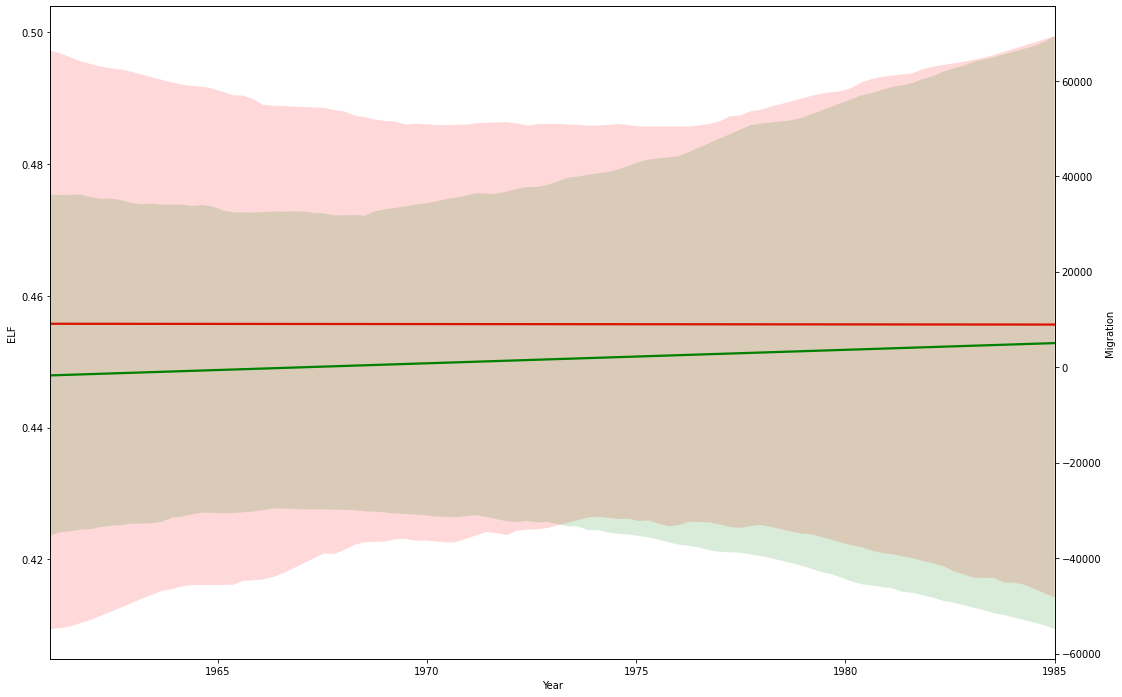

In [59]:
fig, ax = plt.subplots(figsize=(18, 12))
sns.regplot(x="Year", y= "ELF", data = frac_6185, color = 'red', ax = ax, scatter = False)
ax2 = ax.twinx()
sns.regplot(x="Year", y= "Migration", data = frac_6185, color = 'green', ax = ax2, scatter = False)

<AxesSubplot:label='669e9ed2-418d-407e-ad68-a228c79af931', xlabel='Year', ylabel='GDP'>

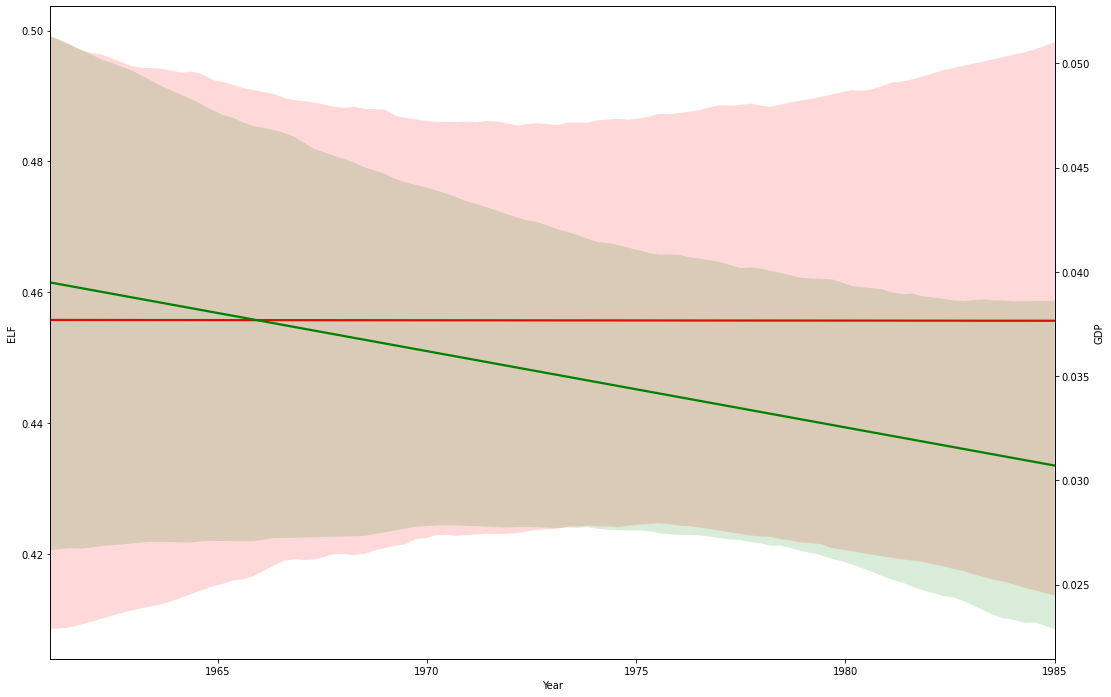

In [775]:
fig, ax = plt.subplots(figsize=(18, 12))
sns.regplot(x="Year", y= "ELF", data = frac_6185, color = 'red', ax = ax, scatter = False)
ax2 = ax.twinx()
sns.regplot(x="Year", y= "GDP", data = frac_6185, color = 'green', ax = ax2, scatter = False)

<AxesSubplot:label='fbcebd18-b335-4ab3-bd72-137f73a5b594', xlabel='Year', ylabel='Education'>

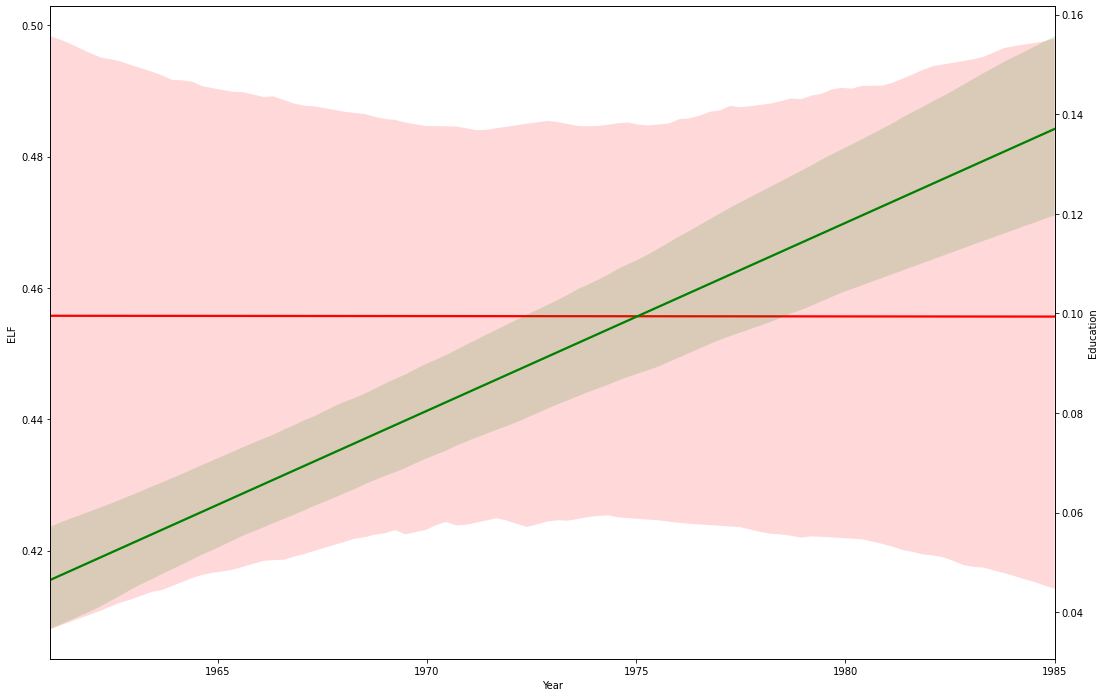

In [776]:
fig, ax = plt.subplots(figsize=(18, 12))
sns.regplot(x="Year", y= "ELF", data = frac_6185, color = 'red', ax = ax, scatter = False)
ax2 = ax.twinx()
sns.regplot(x="Year", y= "Education", data = frac_6185, color = 'green', ax = ax2, scatter = False)

<AxesSubplot:label='efaca92d-6a8e-4fd8-b3d8-8df4a9f8cda8', xlabel='Year', ylabel='Urban'>

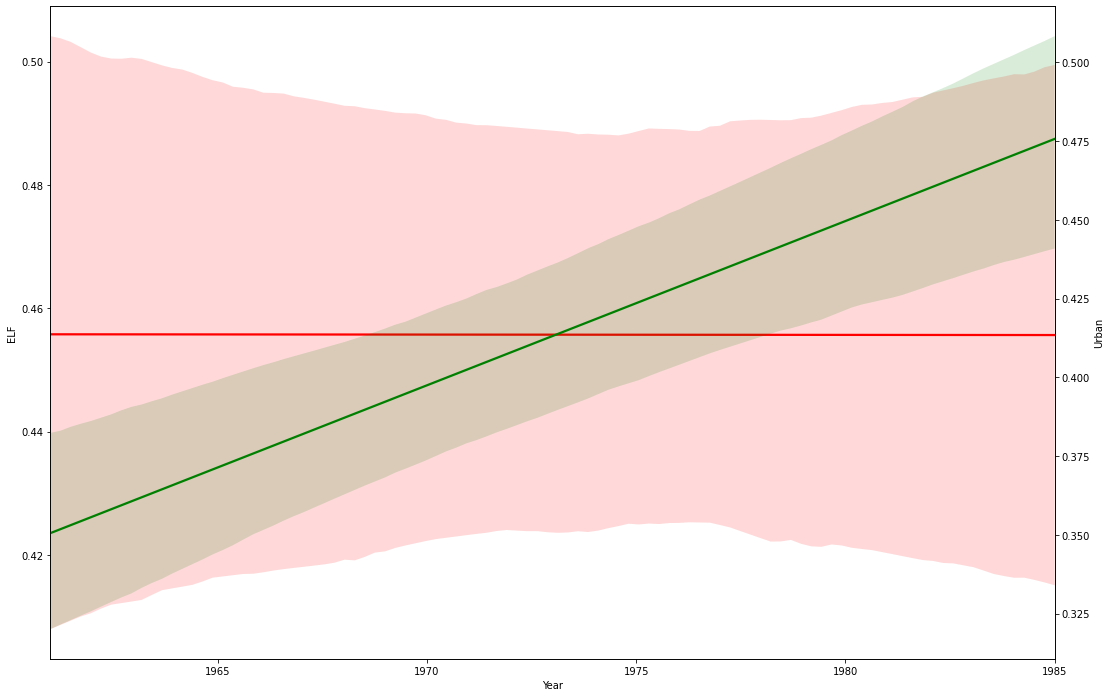

In [777]:
fig, ax = plt.subplots(figsize=(18, 12))
sns.regplot(x="Year", y= "ELF", data = frac_6185, color = 'red', ax = ax, scatter = False)
ax2 = ax.twinx()
sns.regplot(x="Year", y= "Urban_%", data = frac_6185, color = 'green', ax = ax2, scatter = False)

<AxesSubplot:label='a6b852f8-89d0-437a-a9d7-cd551595a2a6', xlabel='Year', ylabel='Rural'>

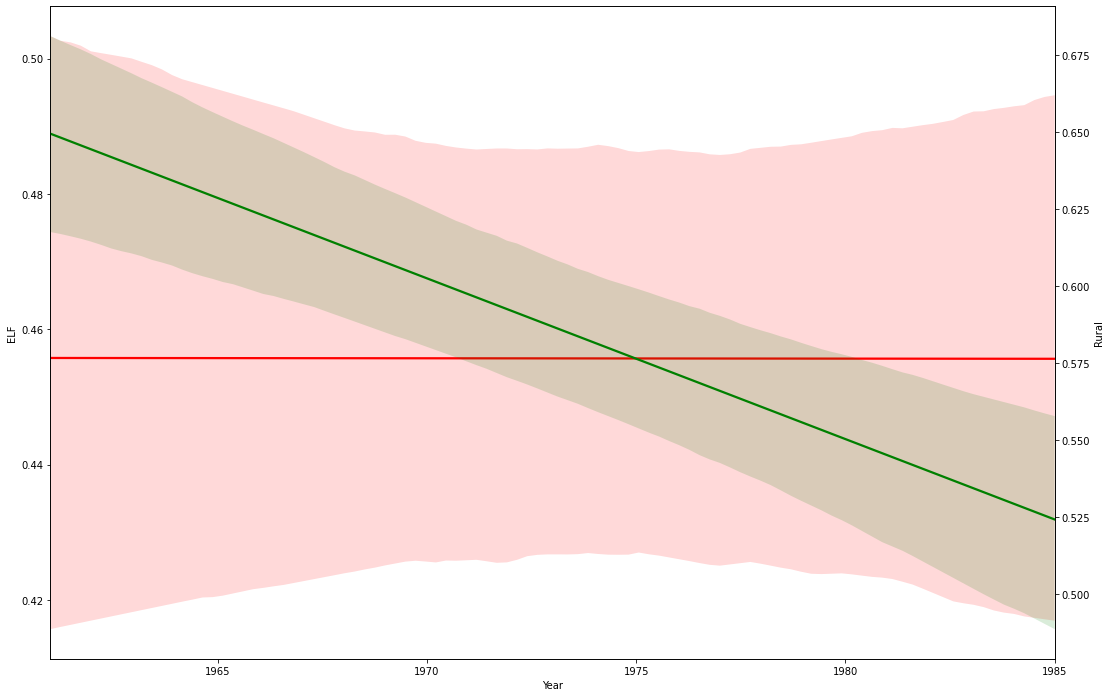

In [778]:
fig, ax = plt.subplots(figsize=(18, 12))
sns.regplot(x="Year", y= "ELF", data = frac_6185, color = 'red', ax = ax, scatter = False)
ax2 = ax.twinx()
sns.regplot(x="Year", y= "Rural_%", data = frac_6185, color = 'green', ax = ax2, scatter = False)

<AxesSubplot:label='e832270b-6bec-4afb-b3d2-83c01be458b9', xlabel='Year', ylabel='Infant'>

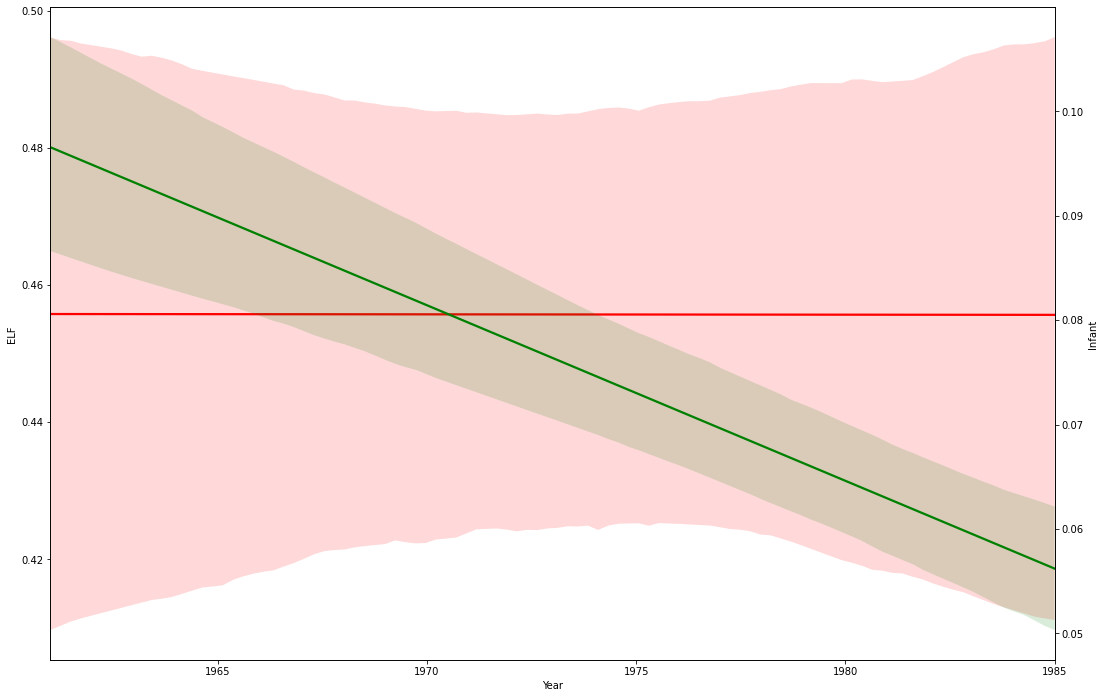

In [779]:
fig, ax = plt.subplots(figsize=(18, 12))
sns.regplot(x="Year", y= "ELF", data = frac_6185, color = 'red', ax = ax, scatter = False)
ax2 = ax.twinx()
sns.regplot(x="Year", y= "Infant", data = frac_6185, color = 'green', ax = ax2, scatter = False)

<AxesSubplot:label='30c8726a-8514-44a0-bf8d-e4b1f16318a4', xlabel='Year', ylabel='Cereal_Yield'>

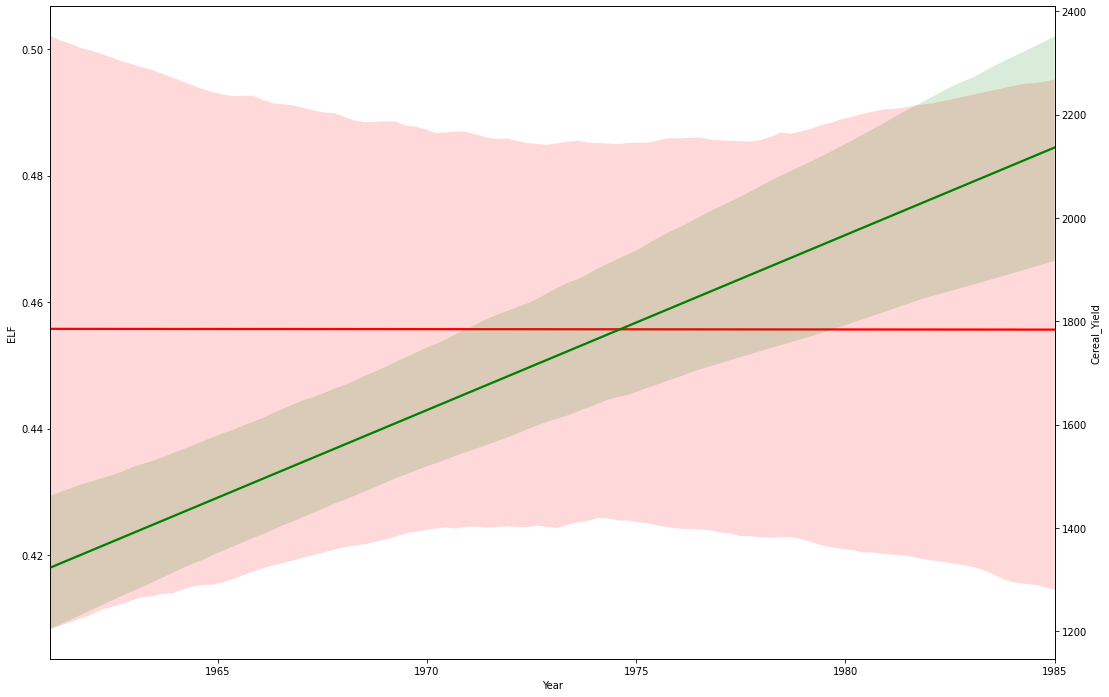

In [891]:
fig, ax = plt.subplots(figsize=(18, 12))
sns.regplot(x="Year", y= "ELF", data = frac_6185, color = 'red', ax = ax, scatter = False)
ax2 = ax.twinx()
sns.regplot(x="Year", y= "Cereal_Yield", data = frac_6185, color = 'green', ax = ax2, scatter = False)

<AxesSubplot:>

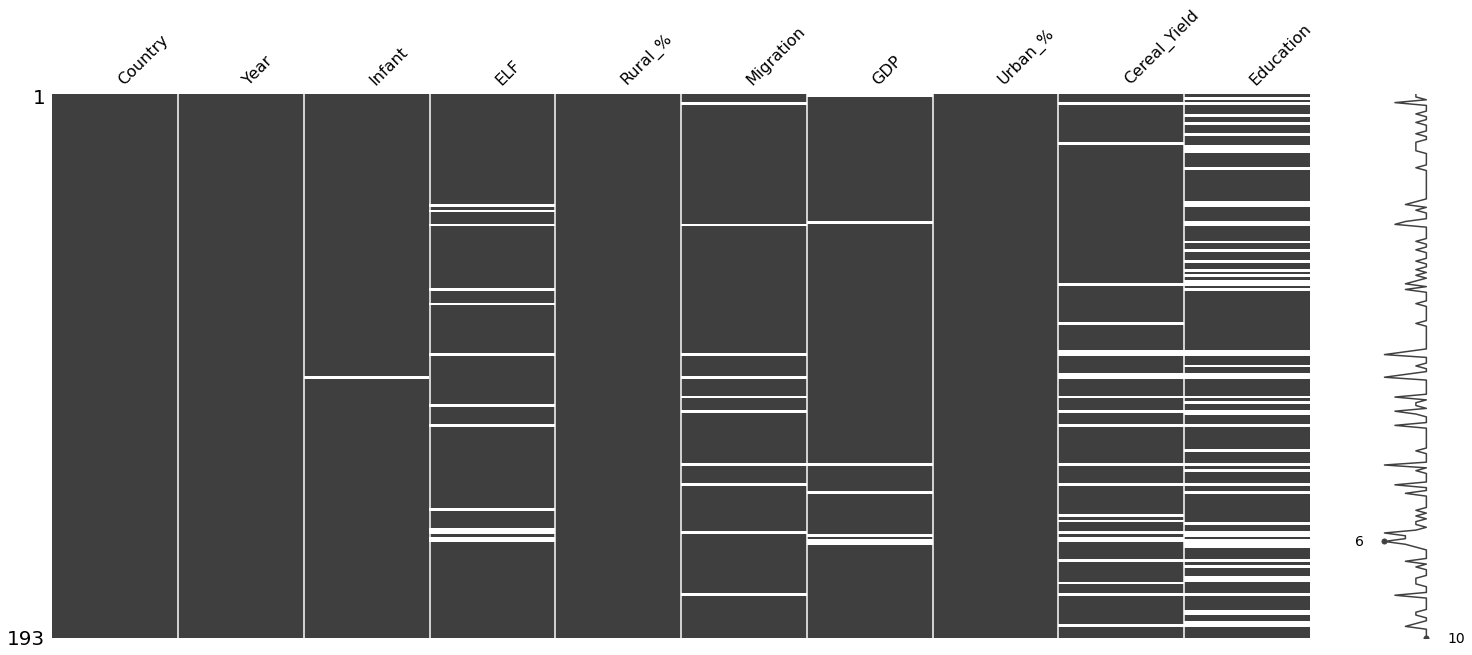

In [1157]:
#Checking for Missing Values
miss.matrix(frac_2001)

In [146]:
#Dropping NA values 
NA_2001 = frac_2001[~frac_2001.isna().any(axis=1)]

#Dropping the year column 
NA_2001 = NA_2001.drop(columns = ['Year'])

#Dropping the country column
NA_2001 = NA_2001.drop(columns = ['Country'])

In [147]:
#Split the data into test and training data
y = NA_2001[['ELF']]
X = NA_2001.drop(columns=['ELF'])
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = .25, random_state = 111)

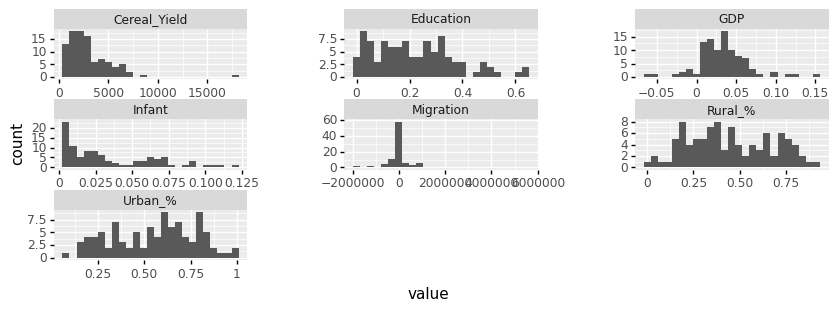

<ggplot: (311348029)>

In [148]:
# Plotted the float variables
d = train_X.select_dtypes(include="float").melt()
(
    ggplot(d,aes(x="value")) +
    geom_histogram(bins = 25) +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(10,3),
          subplots_adjust={'wspace':0.5}, panel_spacing_y=0.2)
)

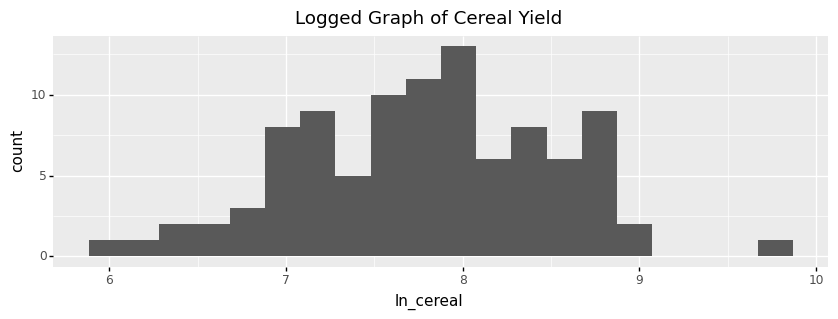

<ggplot: (311126348)>

In [149]:
#Plotted the log transformation of the Infant column
d = train_X.copy()
d['ln_cereal'] =  np.log(d['Cereal_Yield'] + 1)
(
    ggplot(d,aes(x="ln_cereal")) +
    geom_histogram(bins = 20) +
    ggtitle ("Logged Graph of Cereal Yield") +
    theme(figure_size=(10,3),
          subplots_adjust={'wspace':0.25})
)

In [150]:
#Logged Cereal_Yield and created a new column for that value
NA_2001['ln_cereal'] =  np.log(NA_2001['Cereal_Yield'])

#Dropped the original Amount column
NA_2001 = NA_2001.drop(['Cereal_Yield'],axis=1)

In [151]:
#Split the data into test and training data
y = NA_2001['ELF']
X = NA_2001.drop(columns=['ELF'])
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = .25, random_state = 111)

In [152]:
# Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits=10, shuffle=True,random_state=1234)

In [1076]:
#Created an array of all possible options
options = np.arange(87)

In [1077]:
#Passed a dictionary of all the tuning parameter values that we want to explore
knn_tune_params = {'n_neighbors':options}

In [1078]:
#Wrapped the model method in the GridSearchCV() class
tune_knn = GridSearchCV(KNN(),knn_tune_params,
                        cv = fold_generator,
                        scoring='neg_mean_squared_error',
                        n_jobs=4)

In [1079]:
#Tunned KNN
tune_knn.fit(train_X,train_y)

GridSearchCV(cv=KFold(n_splits=10, random_state=1234, shuffle=True),
             estimator=KNeighborsRegressor(), n_jobs=4,
             param_grid={'n_neighbors': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86])},
             scoring='neg_mean_squared_error')

In [1080]:
#Best number of neighbors
tune_knn.best_params_

{'n_neighbors': 8}

In [1081]:
#Wrapped the model method in the GridSearchCV() class
tune_dt = GridSearchCV(DT(),{'max_depth':[i for i in range(1000,1500)]},
                        cv = fold_generator,
                        scoring='neg_mean_squared_error',
                        n_jobs=5)

In [1082]:
#Tunned the Decision Tree
tune_dt.fit(train_X,train_y)

GridSearchCV(cv=KFold(n_splits=10, random_state=1234, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=5,
             param_grid={'max_depth': [1000, 1001, 1002, 1003, 1004, 1005, 1006,
                                       1007, 1008, 1009, 1010, 1011, 1012, 1013,
                                       1014, 1015, 1016, 1017, 1018, 1019, 1020,
                                       1021, 1022, 1023, 1024, 1025, 1026, 1027,
                                       1028, 1029, ...]},
             scoring='neg_mean_squared_error')

In [1083]:
#Best tree depth size
tune_dt.best_params_

{'max_depth': 1460}

In [1084]:
#Wrapped the model method in the GridSearchCV() class
rf_params = {'max_depth':[i for i in range(100)],
             'n_estimators':[1000],
              'max_features': [1,2,3]} # Only have three total.
tune_rf = GridSearchCV(RF(),rf_params,
                        cv = fold_generator,
                        scoring='neg_mean_squared_error',
                        n_jobs=4)

In [1085]:
#Tuned random forest
tune_rf.fit(train_X,train_y)

KeyboardInterrupt: 

In [ ]:
#Best parameters for random forest
tune_rf.best_params_

In [153]:
pipe = Pipeline(steps=[('pre_process', pp.MinMaxScaler()),('model',None)])

In [159]:
search_space = [
    # Linear Model
    {'model' : [LM()]},
    
    # NaiveBayes
    {'model': [NB()]},
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[1, 8, 10, 25, 50, 75]},
    
    # Decision Tree with the Max Depth Param
    {'model': [DT(random_state=1234)],
     'model__max_depth':[1,2,3,4]},
    
    # Random forest with the N Estimators tuning param
    {'model' : [RF(random_state=1234)],
    'model__max_depth':[2,3,4],
    'model__n_estimators':[500,1000,1500],
    'model__max_features':[1,2,3]}
    
]

In [160]:
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='neg_mean_squared_error',
                      n_jobs=4)

In [161]:
search.fit(train_X,train_y)

GridSearchCV(cv=KFold(n_splits=10, random_state=1234, shuffle=True),
             estimator=Pipeline(steps=[('pre_process', MinMaxScaler()),
                                       ('model', None)]),
             n_jobs=4,
             param_grid=[{'model': [LinearRegression()]},
                         {'model': [GaussianNB()]},
                         {'model': [KNeighborsRegressor()],
                          'model__n_neighbors': [1, 8, 10, 25, 50, 75]},
                         {'model': [DecisionTreeRegressor(random_state=1234)],
                          'model__max_depth': [1, 2, 3, 4]},
                         {'model': [RandomForestRegressor(max_depth=2,
                                                          max_features=3,
                                                          n_estimators=1500,
                                                          random_state=1234)],
                          'model__max_depth': [2, 3, 4],
                          'model__max

In [162]:
#Best score
search.best_score_

-0.055642203880688676

In [163]:
#Best parameters
search.best_params_

{'model': RandomForestRegressor(max_depth=2, max_features=3, n_estimators=1500,
                       random_state=1234),
 'model__max_depth': 2,
 'model__max_features': 3,
 'model__n_estimators': 1500}

In [164]:
#Labelled the best model
rf_mod = search.best_estimator_

In [165]:
#Ran predict on the test data to use the best model
pred_y = search.predict(test_X)

In [166]:
vi = permutation_importance(rf_mod,train_X,train_y,n_repeats=5)

In [167]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                           vi = vi['importances_mean'],
                           std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

,variable,vi,std,low,high
0,Infant,0.232395,0.029689,0.173017,0.291772
1,Urban_%,0.065968,0.015345,0.035279,0.096658
2,ln_cereal,0.065151,0.016220,0.032710,0.097592
3,Rural_%,0.041518,0.010261,0.020997,0.062039
4,Education,0.020939,0.008658,0.003623,0.038254
5,Migration,0.014873,0.005285,0.004303,0.025443
6,GDP,0.005905,0.000736,0.004432,0.007378


In [1093]:
#Determined the MSE of the prediction
m.mean_squared_error(test_y,pred_y)

0.051811685425025567

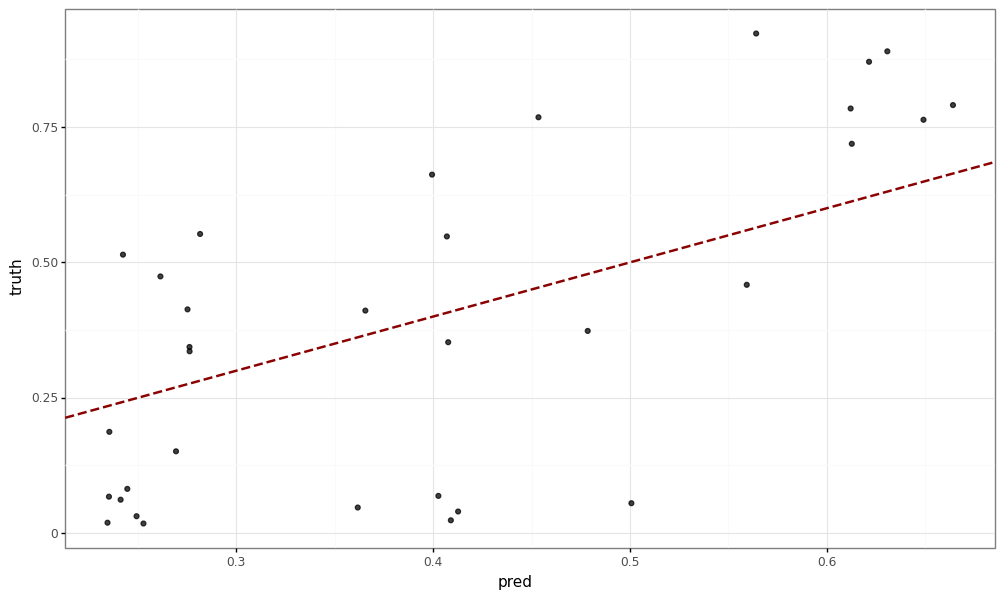

<ggplot: (320585030)>

In [1094]:
#Plotted the prediction against the actual data
(
    ggplot(pd.DataFrame(dict(pred=pred_y,truth=test_y)),
          aes(x='pred',y="truth")) +
    geom_point(alpha=.75) +
    geom_abline(linetype="dashed",color="darkred",size=1) +
    theme_bw() +
    theme(figure_size=(12,7))
)

In [1168]:
#Dropping the country column
frac_2001 = frac_2001.drop(columns = ['Country'])

#Filled NA
frac_2001 = frac_2001.fillna(0)

In [1185]:
#Split the data into test and training data
y = frac_2001['ELF']
X = frac_2001.drop(columns=['ELF'])
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = .25, random_state = 111)

In [1177]:
#Logged Cereal_Yield and created a new column for that value
frac_2001['ln_cereal'] =  np.log(frac_2001['Cereal_Yield'])

#Dropped the original Amount column
frac_2001 = frac_2001.drop(['Cereal_Yield'],axis=1)

KeyError: 'Cereal_Yield'

In [1178]:
#Split the data into test and training data
y = frac_2001[['ELF']]
X = frac_2001.drop(columns=['ELF'])
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = .25, random_state = 111)

In [1179]:
search.fit(train_X,train_y)

GridSearchCV(cv=KFold(n_splits=10, random_state=1234, shuffle=True),
             estimator=Pipeline(steps=[('pre_process', MinMaxScaler()),
                                       ('model', None)]),
             n_jobs=4,
             param_grid=[{'model': [GaussianNB()]},
                         {'model': [KNeighborsRegressor()],
                          'model__n_neighbors': [1, 8, 10, 25, 50, 75]},
                         {'model': [DecisionTreeRegressor()],
                          'model__max_depth': [1, 2, 3, 4]},
                         {'model': [RandomForestRegressor(max_depth=4,
                                                          max_features=3,
                                                          n_estimators=500)],
                          'model__max_depth': [2, 3, 4],
                          'model__max_features': [1, 2, 3],
                          'model__n_estimators': [500, 1000, 1500]}],
             scoring='neg_mean_squared_error')

In [1180]:
#Best score
search.best_score_

-0.06520164774827057

In [1181]:
#Best parameters
search.best_params_

{'model': RandomForestRegressor(max_depth=4, max_features=3, n_estimators=500),
 'model__max_depth': 4,
 'model__max_features': 3,
 'model__n_estimators': 500}

In [1182]:
#Ran predict on the test data to use the best model
pred_y = search.predict(test_X)

In [1183]:
#Determined the MSE of the prediction
m.mean_squared_error(test_y,pred_y)

0.07001583908394492

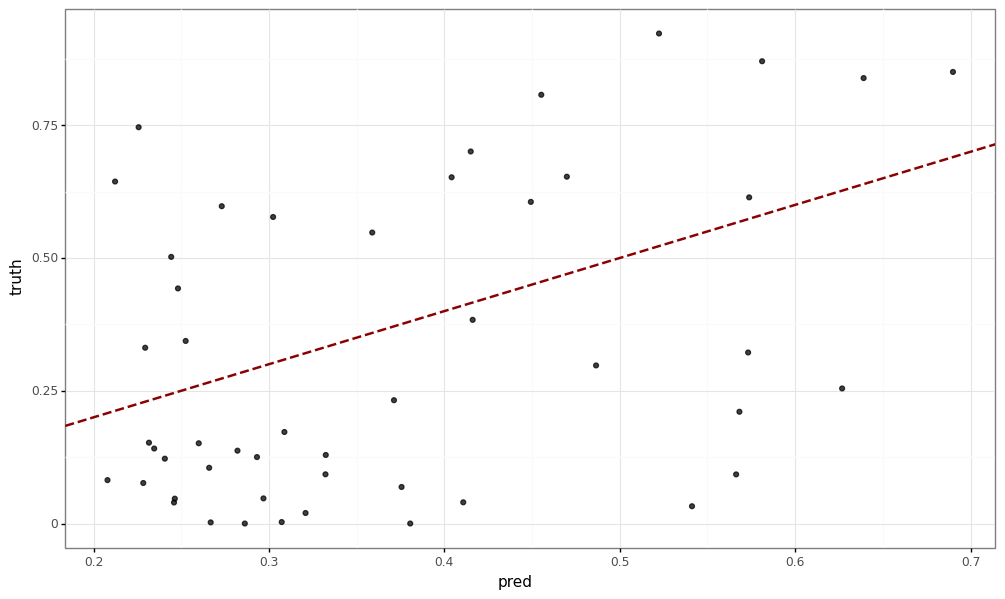

<ggplot: (320653599)>

In [1186]:
#Plotted the prediction against the actual data
(
    ggplot(pd.DataFrame(dict(pred=pred_y,truth=test_y)),
          aes(x='pred',y="truth")) +
    geom_point(alpha=.75) +
    geom_abline(linetype="dashed",color="darkred",size=1) +
    theme_bw() +
    theme(figure_size=(12,7))
)

In [926]:
#Saved the absolute values of the correlation matrix
correlation = frac_2001.corr().abs()

#Pivoted a level of the index labels
unstack_correlation = correlation.unstack()

#Sorted the correlations
compare = unstack_correlation.sort_values(kind="quicksort")

compare['ELF']

Migration       0.087654
GDP             0.171663
Cereal_Yield    0.309310
Education       0.319121
Urban_%         0.393999
Rural_%         0.393999
Infant          0.594923
ELF             1.000000
Year                 NaN
dtype: float64

In [55]:
#Created a dataframe of only the 1961 data from frac_6185
frac_61 = frac_6185.drop(columns = [1, 3, 4, 5, 7, 8, 9, 10, 11, 12])

#Inserted a row 
frac_61.insert(1, "Year", "1961")

#Renamed the columns
frac_61.columns = ['Temp_Country', 'Year', 'ELF']

#Created a dataframe of only the 1985 data from frac_6185
frac_85 = frac_6185.drop(columns = [1, 3, 4, 5, 6, 7, 8, 10, 11, 12])

#Inserted a row 
frac_85.insert(1, "Year", "1985")

#Renamed the columns
frac_85.columns = ['Temp_Country', 'Year', 'ELF']

In [56]:
#Concatted the 2 dataframes back into frac_6185
frac_6185 = pd.concat([frac_61, frac_85], ignore_index = True)

In [ ]:
#Outer merged both fractionalization datasets 
frac = pd.merge(frac_2001, frac_6185, on = ['Country', 'Year', 'ELF'], how = 'outer')

#Outer merged the IMD with frac 
temp = pd.merge(frac, IMD, on = ['Country', 'Year'], how = 'outer')

In [33]:
#Created a for loop that created a list of columns names from the 3rd row and change the datatype as appropriate
names = []
for x in IMD.iloc[2]:
    if isinstance(x, str):
        names.append(x)
    elif isinstance(x, float):
        y = x.astype(int)
        names.append(y)
        
#Changed the column names
IMD.columns = names

#Created a list of the column names I am interested in
notdrop = ['Country Name', 1961, 1985, 2001]

#Dropped all columns that were not in 'notdrop' list
for x in IMD.columns:
    if x not in notdrop:
        IMD = IMD.drop(columns = [x])

#Renamed a column
IMD.columns = ['Temp_Country', 'Infant_1961', 'Infant_1985', 'Infant_2001']

#Dropped rows 
IMD = IMD.drop([0,1,2])

In [34]:
#Created a dataframe of only the 1961 data from IMD
IMD_61 = IMD.drop(columns = ['Infant_1985', 'Infant_2001'])

#Inserted a row 
IMD_61.insert(1, "Year", "1961")

#Renamed the columns
IMD_61.columns = ['Temp_Country', 'Year', 'Infant']

#Created a dataframe of only the 1985 data from IMD
IMD_85 = IMD.drop(columns = ['Infant_1961', 'Infant_2001'])

#Inserted a row 
IMD_85.insert(1, "Year", "1985")

#Renamed the columns
IMD_85.columns = ['Temp_Country', 'Year', 'Infant']

#Created a dataframe of only the 2001 data from IMD
IMD_01 = IMD.drop(columns = ['Infant_1961', 'Infant_1985'])

#Inserted a row 
IMD_01.insert(1, "Year", "2001")

#Renamed the columns
IMD_01.columns = ['Temp_Country', 'Year', 'Infant']

#Created a list of all the individual IMD dataframes
IMD_list = [IMD_61, IMD_85, IMD_01]

In [36]:
#Concatted the 3 dataframes back into IMD
IMD = pd.concat(IMD_list)

,Temp_Country,Year,Infant
3,Aruba,1961,NaN
4,Afghanistan,1961,NaN
5,Angola,1961,NaN
6,Albania,1961,NaN
7,Andorra,1961,NaN
...,...,...,...
262,Kosovo,2001,NaN
263,"Yemen, Rep.",2001,65.7
264,South Africa,2001,46.6
265,Zambia,2001,85.0


In [14]:
#Outer merged both fractionalization datasets 
frac = pd.merge(frac_2001, frac_6185, on = ['Country', 'Year', 'ELF'], how = 'outer')

#Outer merged the IMD with frac 
temp = pd.merge(frac, IMD, on = ['Country', 'Year'], how = 'outer')

In [57]:
temp = temp.sort_values(by = ['Country','Year']).reset_index(drop = True)
temp.dtypes

Country     object
Year        object
ELF         object
Infant     float64
dtype: object

In [65]:
temp['ELF'] = temp['ELF'].astype(float)
temp['Infant'] = temp['Infant'].astype(float)
temp['Year'] = temp['Year'].astype(int)

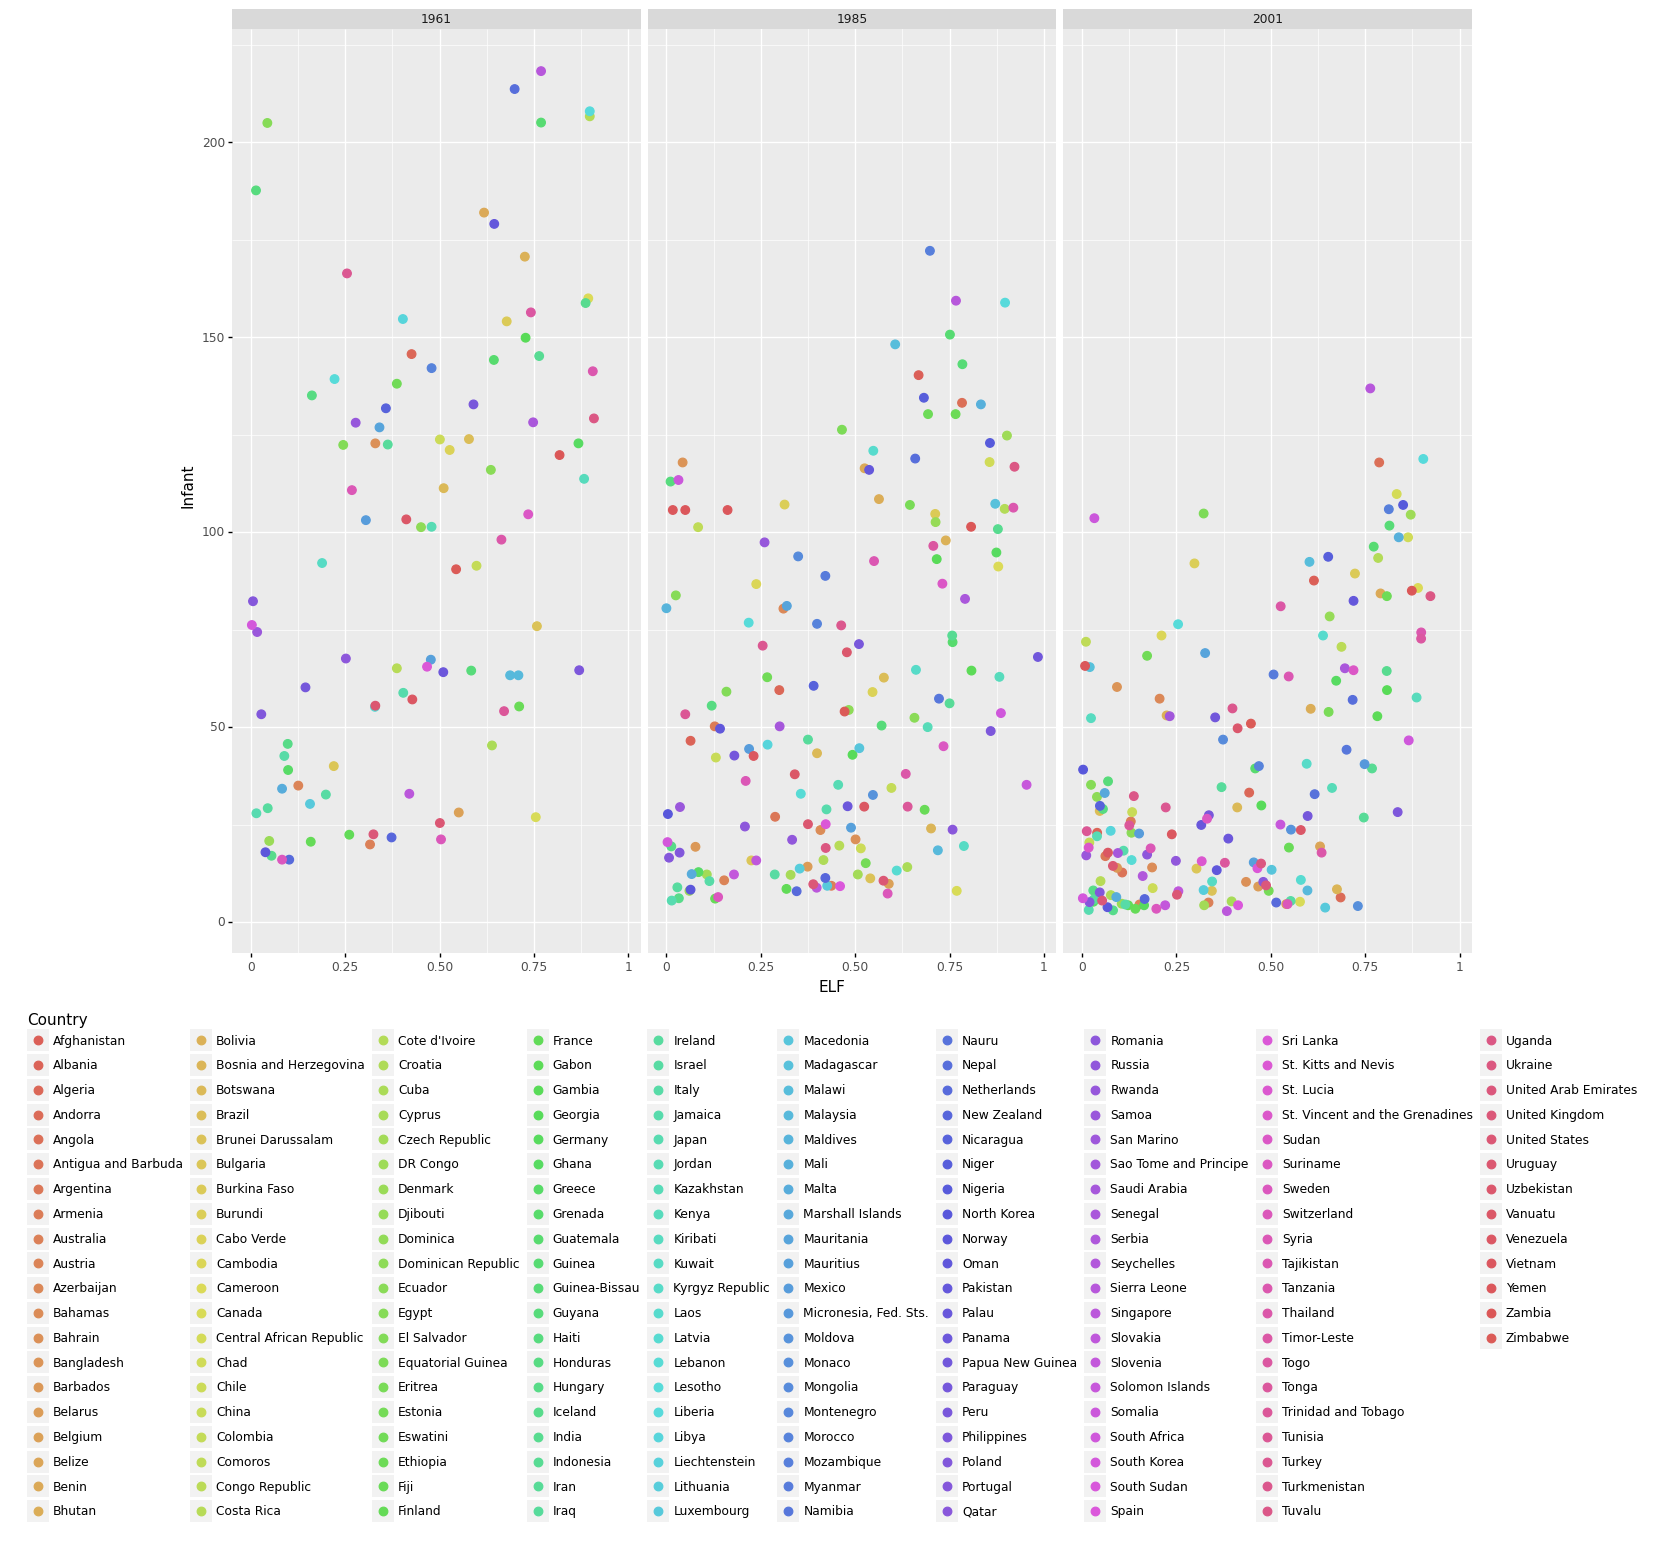

<ggplot: (367419444)>

In [147]:
(ggplot(temp, aes(x='ELF', y='Infant', color = "Country")) +
geom_point(size = 3) +
facet_wrap(['Year']) +
theme(legend_position = (0.5, -0.15), figure_size=(16, 12)))

<AxesSubplot:label='2707f441-53f3-484c-8d9e-36bce20af3ac', xlabel='Year', ylabel='Infant'>

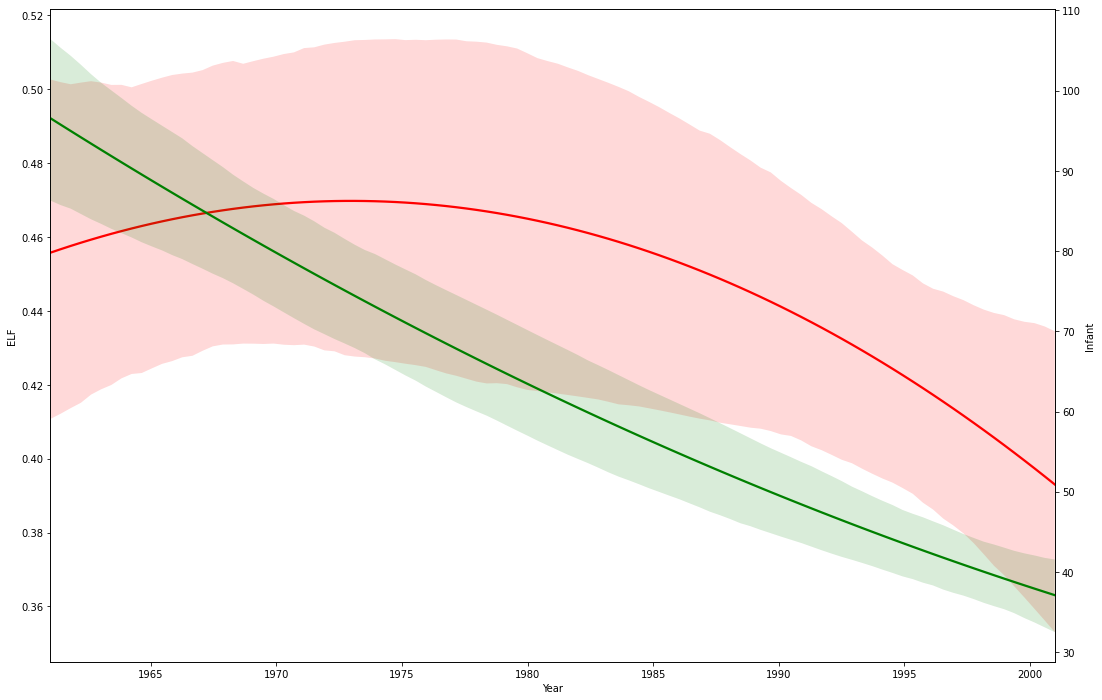

In [148]:
fig, ax = plt.subplots(figsize=(18, 12))
sns.regplot(x="Year", y= "ELF", data = temp, color = 'red', order = 2, ax = ax, scatter = False)
ax2 = ax.twinx()
sns.regplot(x="Year", y= "Infant", data = temp, color = 'green', order = 2, ax = ax2, scatter = False)

In [149]:
#Saved the absolute values of the correlation matrix
correlation = temp.corr().abs()

#Pivoted a level of the index labels
unstack_correlation = correlation.unstack()

#Sorted the correlations
compare = unstack_correlation.sort_values(kind="quicksort")

compare

Year    ELF       0.087516
ELF     Year      0.087516
        Infant    0.428920
Infant  ELF       0.428920
Year    Infant    0.467452
Infant  Year      0.467452
Year    Year      1.000000
ELF     ELF       1.000000
Infant  Infant    1.000000
dtype: float64

In [152]:
#Dropped all observations where the outcome is missing
temp = temp[~temp.ELF.isna()]
temp = temp[~temp.Infant.isna()]

In [154]:
temp_y = temp['ELF'] # OUTCOME: the log selling price
temp_X = temp[['Infant']] # PREDICTORS: simplified for our purposes

In [167]:
y = temp['ELF'] # OUTCOME: the log selling price
X = temp[['Infant']] # PREDICTORS: simplified for our purposes

# (0) Split the data 
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=1988)

# (1) Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits=5, shuffle=True,random_state=111)

# (2) Next specify the preprocessing steps
preprocess = ColumnTransformer(transformers=[('num', pp.MinMaxScaler(), ['Infant'])])


# (3) Next Let's create our model pipe (note for the model we leave none as a placeholder)
pipe = Pipeline(steps=[('pre_process', preprocess),
                       ('model',None)])


# (4) Specify the models and their repsective tuning parameters. 
# Note the naming convention here to reference the model key
search_space = [
    # Linear Model
    {'model' : [LM()]},
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[10,15,20,25,30]},
    
    # Decision Tree with the Max Depth Param
    {'model': [DTree()],
     'model__max_depth':[1,2,3,5]},
    
    # The Bagging decision tree model 
    {'model': [Bag()]},
    
    # Random forest with the N Estimators tuning param
    {'model' : [RF()],
     'model__max_depth':[1,2,3],
     'model__n_estimators':[500,1000,1250]},
]


# (5) Put it all together in the grid search
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='neg_mean_squared_error',
                      n_jobs=4)

# (6) Fit the model to the training data
search.fit(train_X,train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=Pipeline(steps=[('pre_process',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['Infant'])])),
                                       ('model', None)]),
             n_jobs=4,
             param_grid=[{'model': [LinearRegression()]},
                         {'model': [KNeighborsRegressor()],
                          'model__n_neighbors': [10, 15, 20, 25, 30]},
                         {'model': [DecisionTreeRegressor()],
                          'model__max_depth': [1, 2, 3, 5]},
                         {'model': [BaggingRegressor()]},
                         {'model': [RandomForestRegressor()],
                          'model__max_depth': [1, 2, 3],
                          'model__n_estimators': [

In [169]:
search.best_score_

-0.061607285717327785

In [170]:
search.best_params_

{'model': LinearRegression()}

In [171]:
# Predict() method will use the best model out of the scan
pred_y = search.predict(test_X)

In [172]:
m.mean_squared_error(test_y,pred_y)

0.06863161887728654

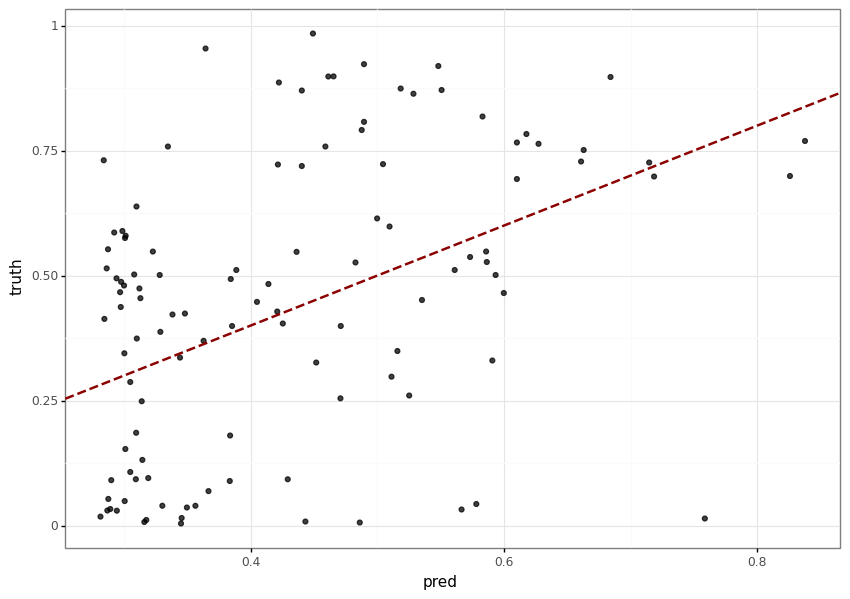

<ggplot: (365579698)>

In [174]:
(
    ggplot(pd.DataFrame(dict(pred=pred_y,truth=test_y)),
          aes(x='pred',y="truth")) +
    geom_point(alpha=.75) +
    geom_abline(linetype="dashed",color="darkred",size=1) +
    theme_bw() +
    theme(figure_size=(10,7))
)


In [156]:
#Created a KFold generator in order to make valid comparions across models
fold_generator = KFold(n_splits = 5, shuffle = True, random_state = 111)

#Using means squared error as the performance metric
use_metrics = ["neg_mean_squared_error"]

In [157]:
#Linear model
lm_scores = cross_validate(LM(), temp_X, temp_y, cv = fold_generator, scoring = use_metrics)

In [158]:
#KNN
knn_scores = cross_validate(KNN(), temp_X, temp_y, cv = fold_generator, scoring = use_metrics)

In [159]:
#Decision Tree
dt_scores = cross_validate(DTree(), temp_X, temp_y, cv = fold_generator, scoring = use_metrics)

In [160]:
#Bagging
bag_scores = cross_validate(Bag(), temp_X, temp_y, cv = fold_generator, scoring = use_metrics)

In [161]:
#Random Forest
rf_scores = cross_validate(RF(), temp_X, temp_y, cv = fold_generator, scoring = use_metrics)

In [162]:
#Collected all the metrics as a dictionary
collect_scores = \
dict(lm = lm_scores['test_neg_mean_squared_error']*-1,
     knn = knn_scores['test_neg_mean_squared_error']*-1,
     dt = dt_scores['test_neg_mean_squared_error']*-1,
     bag = bag_scores['test_neg_mean_squared_error']*-1,
     rf = rf_scores['test_neg_mean_squared_error']*-1)

#Converted to a data frame and reshape
collect_scores = pd.DataFrame(collect_scores).melt(var_name = "Model",value_name = "MSE")

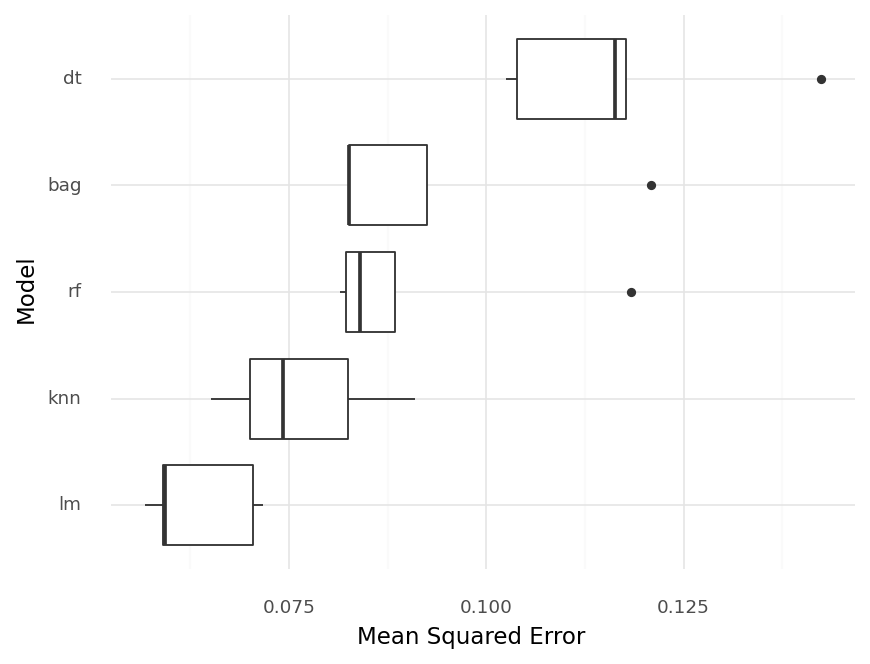

<ggplot: (364236334)>

In [163]:
#Ordered the models
order = (collect_scores.groupby('Model').mean().sort_values(by="MSE").index.tolist())

#Plot
(
    ggplot(collect_scores,
          aes(x="Model",y="MSE")) +
    geom_boxplot() +
    scale_x_discrete(limits=order) +
    labs(x="Model",y="Mean Squared Error") +
    coord_flip() +
    theme_minimal() +
    theme(dpi=150)
)

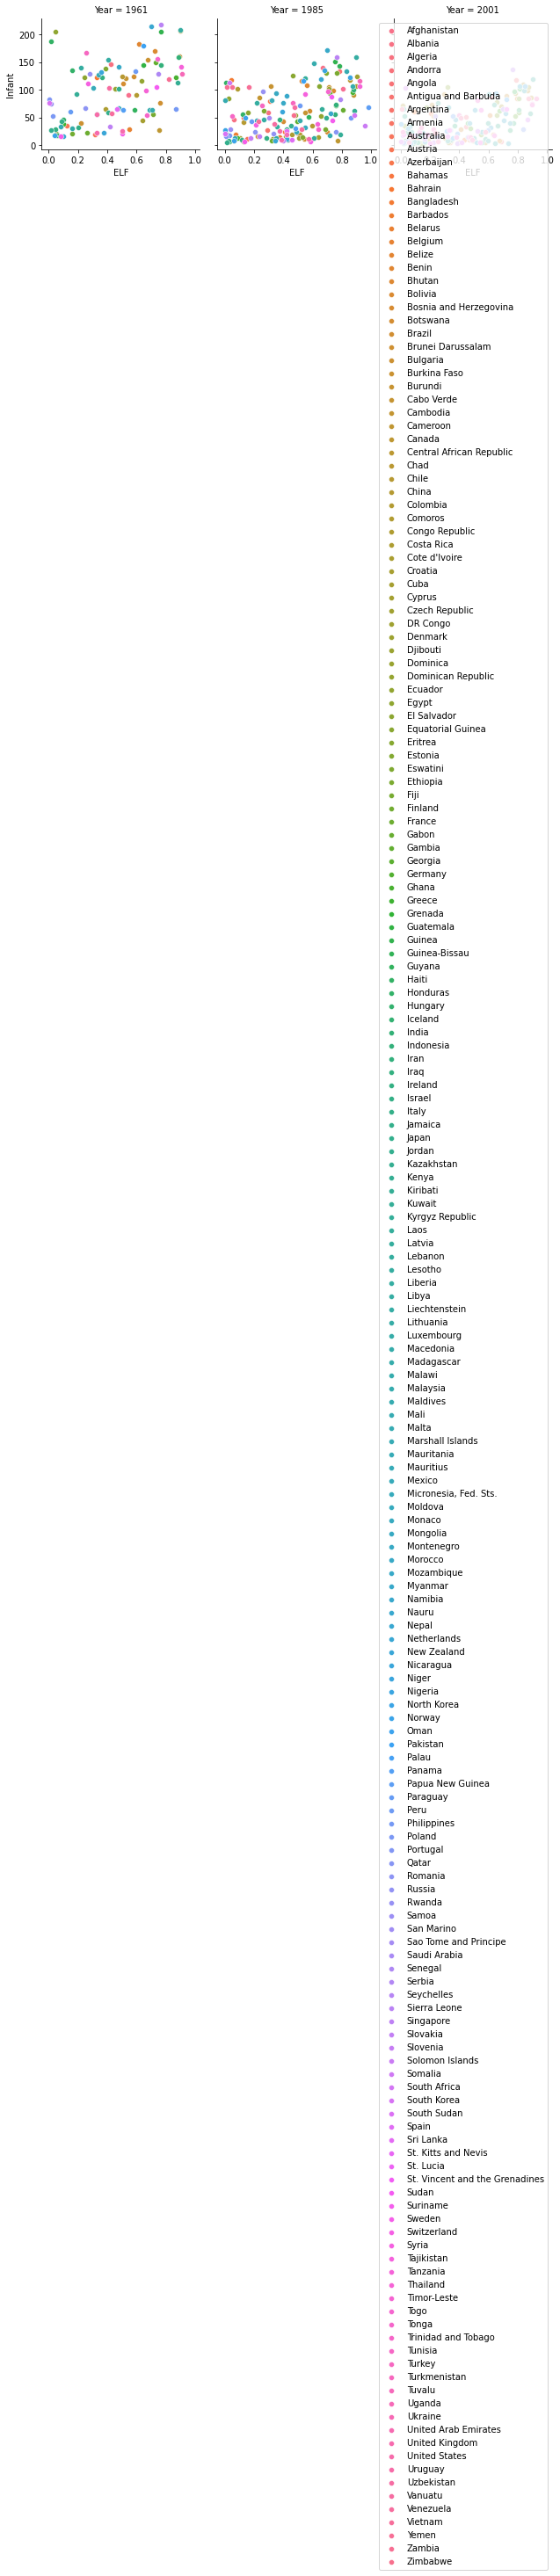

In [108]:
g = sns.FacetGrid(temp, col = "Year", hue = 'Country')
g.map(sns.scatterplot, "ELF", "Infant")
plt.legend()

No handles with labels found to put in legend.


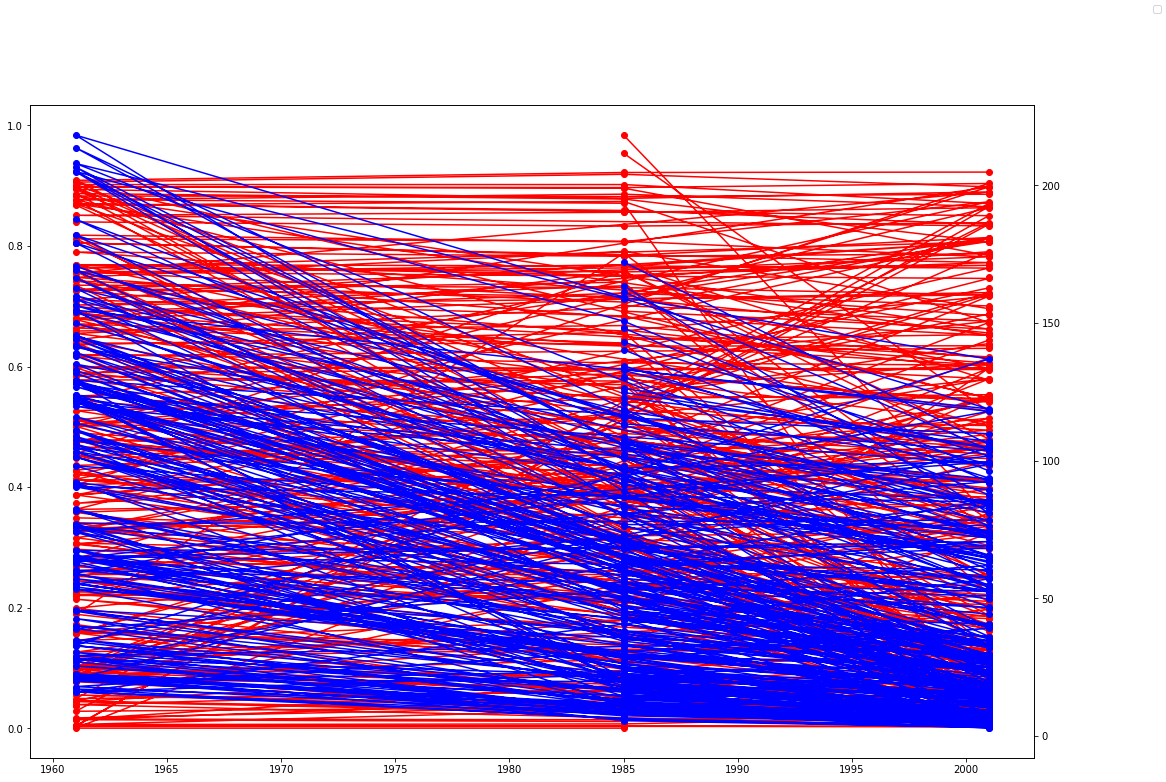

In [98]:
fig,ax = plt.subplots(figsize=(18, 12))
ax.plot(temp.Year, temp.ELF, color = "red", marker="o")
# twin object for two different y-axis on the sample plot
ax2 = ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(temp.Year, temp.Infant, color="blue",marker="o")
ax.figure.legend()

Text(0.5, 1.0, 'Daily New Deaths per 100,000 vs 2016 Presidential Winners per State')

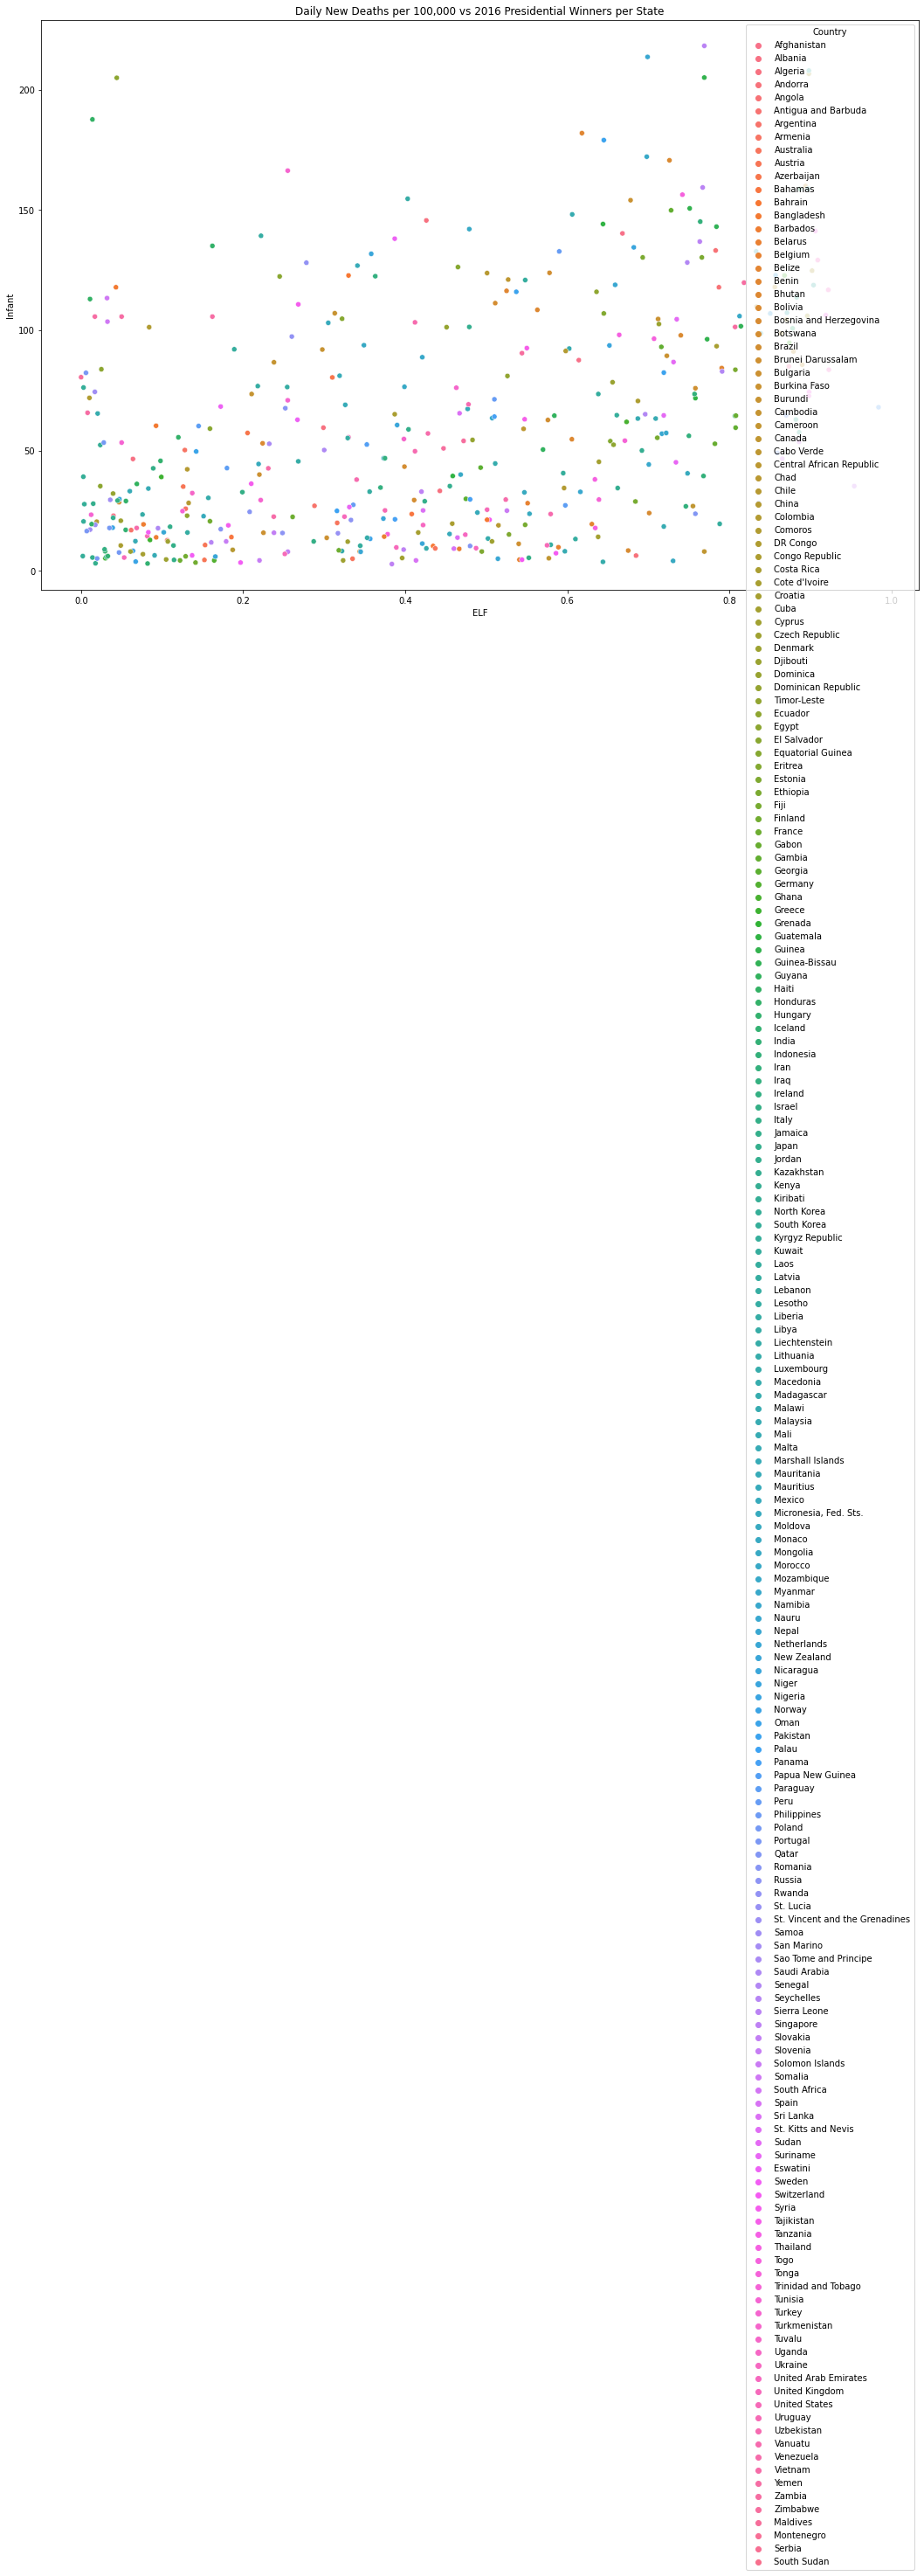

In [27]:
fig, ax = plt.subplots(figsize=(18, 12))
ax= sns.scatterplot(data = temp, x = 'ELF', y = 'Infant', hue = 'Country')
ax.set_title("Daily New Deaths per 100,000 vs 2016 Presidential Winners per State")

In [23]:
hello = pd.melt(temp, id_vars=['Country', 'Year'])
hello

,Country,Year,variable,value
0,Afghanistan,2001,ELF,0.614146
1,Albania,2001,ELF,0.0399248
2,Algeria,2001,ELF,0.442662
3,Andorra,2001,ELF,0.684785
4,Angola,2001,ELF,0.787019
...,...,...,...,...
1177,St. Vincent and the Grenadines,1985,Infant,25.9
1178,Maldives,2001,Infant,28.4
1179,Montenegro,2001,Infant,12.2
1180,Serbia,2001,Infant,10.6


In [ ]:
hello['value'] = hello['value'].astype(float)
hello['variable'] = hello['variable'].astype(int)

DataError: No numeric types to aggregate

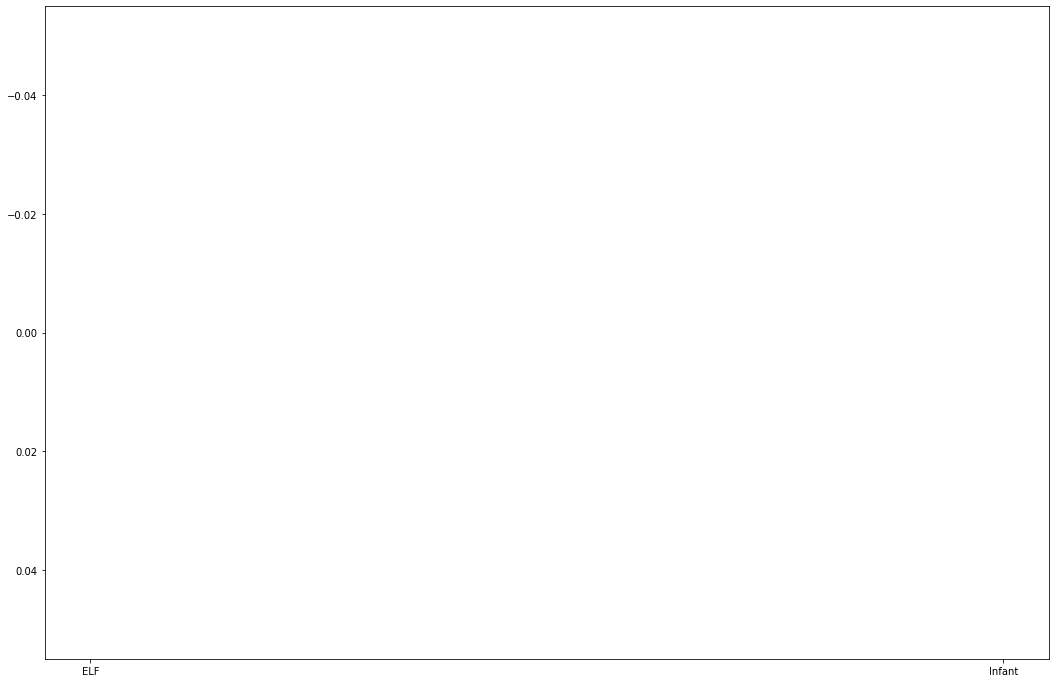

In [21]:
fig, ax = plt.subplots(figsize=(18, 12))
ax= sns.lineplot(data = hello, x = 'variable', y = 'value', hue = 'Country')
ax.set_title("Daily New Deaths per 100,000 vs 2016 Presidential Winners per State")


In [ ]:
frac_2001

In [ ]:
#Created a new list from the first column
un_maam = maam.Country.tolist()

#Country-converter variable to restrict the set to only the official recognized UN members
cc_UN = coco.CountryConverter(only_UNmember=True)

#Ran cc_UN on 'bit_country' and saved that list as 'UN'
UN = cc_UN.convert(un_maam, to = 'name_short')

#Dropped the 'temp_country' column from the dataframe
maam = maam.drop(columns = "Country")

In [ ]:
IMD

In [ ]:
IMD.iloc[2]

In [ ]:
#Created a for loop that would drop the column values that I am not interested in 
names = []
for x in IMD.iloc[2]:
    if isinstance(x, str):
        names.append(x)
    elif isinstance(x, float):
        y = x.astype(int)
        names.append(y)

In [ ]:
IMD.iloc[2]

There were a bunch of columns that I needed to drop seeing as I was only interested in the data for the years 1961, 1985, and 2001. I did this by 

In [ ]:
err = uhm.iloc[2,:4].tolist()

years = uhm.iloc[2,4:].astype('int').tolist()

err.extend(years)

uhm.columns = err

In [ ]:
bad = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 1961, 1985, 2000]

# Check if Dataframe has a column with Label name 'City'
for x in uhm.columns:
    if x not in bad:
        uhm = uhm.drop(columns = [x])

# if '1961' or '1985' or '2000' in uhm.columns :
#     dfObj.drop(['City'] , axis='columns', inplace=True)

In [ ]:
uhm

In [ ]:
names = uhm.loc[2].tolist()

uhm.columns = names
uhm

In [ ]:
#Importing the Infant Mortality Rate
uhm = pd.read_excel(r'Datasets/API_SP.DYN.IMRT.IN_DS2_en_excel_v2_1740589.xls').drop(columns = ['World Development Indicators',
                                                                                                'Unnamed: 2',
                                                                                                'Unnamed: 3',
                                                                                                'Unnamed: 6',
                                                                                                'Unnamed: 7',
                                                                                                'Unnamed: 8',
                                                                                                'Unnamed: 8'])

# #Renaming the columns
# maam.columns = ['Country', 'Source (Ethnicity Data)', 'Date (Ethnicity Data)', 'Ethnic', 'ELF_2001', 'Religion']

# #Replaced rows with value '.' to 'NaN'
# maam = maam.replace('.', 'NaN')

# #Dropped specific columns
# maam = maam.drop(columns = ['Source (Ethnicity Data)', 'Date (Ethnicity Data)', 'Ethnic', 'Religion']).reset_index(drop = True)

In [ ]:
uhm

In [ ]:
#Created a new list from the first column
un_maam = maam.Country.tolist()

#Country-converter variable to restrict the set to only the official recognized UN members
cc_UN = coco.CountryConverter(only_UNmember=True)

#Ran cc_UN on 'bit_country' and saved that list as 'UN'
UN = cc_UN.convert(un_maam, to = 'name_short')

#Dropped the 'temp_country' column from the dataframe
maam = maam.drop(columns = "Country")

In [ ]:
#Created a new column called 'country' and set those values as 'UN'
maam["Country"] = UN

#Set the index as the 'country' column
maam = maam.set_index('Country')

#Dropped any rows that had a "not found" value
maam = maam.drop(index = "not found")

#Reset the index in order to remove the "country" column as the index
maam = maam.reset_index()

In [ ]:
#Created a new list from the first column
un_sir = sir.COUNTRY.tolist()

#Country-converter variable to restrict the set to only the official recognized UN members
cc_UN = coco.CountryConverter(only_UNmember=True)

#Ran cc_UN on 'bit_country' and saved that list as 'UN'
UNsir = cc_UN.convert(un_sir, to = 'name_short')

#Dropped the 'temp_country' column from the dataframe
sir = sir.drop(columns = "COUNTRY")

In [ ]:
#Created a new column called 'country' and set those values as 'UN'
sir["Country"] = UNsir

#Set the index as the 'country' column
sir = sir.set_index('Country')

#Dropped any rows that had a "not found" value
sir = sir.drop(index = "not found")

#Reset the index in order to remove the "country" column as the index
sir = sir.reset_index()

In [ ]:
#Outer merged both fractionalization measures 
baby = pd.merge(maam,sir,on = 'Country', how = 'outer')

# #Filled the NA values into 
# test = baby.dropna()

In [ ]:
hello = pd.melt(baby, id_vars=['Country'])
hello.dtypes

In [ ]:
hello['value'] = hello['value'].astype(float)
hello['variable'] = hello['variable'].astype(int)

In [ ]:
fig, ax = plt.subplots(figsize=(18, 12))
ax= sns.lineplot(data = hello, x = 'variable', y = 'value', hue = 'Country')
ax.set_title("Daily New Deaths per 100,000 vs 2016 Presidential Winners per State")


In [ ]:
sns.lineplot(data = hello, x = 'variable', y = 'value', hue = 'Country')


In [ ]:
#Importing 2003 fractionalization dataset & dropping 5 rows
heir = pd.read_excel(r'Datasets/BL2013_F_v2.2.xls').drop(columns = ['Unnamed: 4',
                                                                    'Unnamed: 5', 
                                                                    'Unnamed: 6', 
                                                                    'Unnamed: 7',
                                                                    'Unnamed: 8',
                                                                    'Unnamed: 9',
                                                                    'Unnamed: 10',
                                                                    'Unnamed: 12',
                                                                    'Unnamed: 13',
                                                                    'Unnamed: 14',
                                                                    'Unnamed: 15',
                                                                    'Unnamed: 16'])

#Renaming the columns
heir.columns = ['Country', 'Year', 'Age Group Min', 'Age Group Max', 'Avg. Years of Total Schooling']

#Dropped specific rows
heir = heir.drop(np.arange(13)).reset_index(drop = True)

In [ ]:
temp = heir
temp

In [ ]:
temp.Country

In [ ]:
for x in range(5): 
    if pd.isna(temp.Country[x]) == False:
        country = temp.Country[x]
    else:
        temp.Country.replace(x, country)

In [ ]:
temp.replace.Country(NaN, 0)

In [ ]:
df[df.isna().any(axis=1)]

In [ ]:
df.loc[df['column_name'] == some_value]